## 2 - Export Data Assessment (Surface Position)

##### Imports

In [1]:
import os
import pandas as pd
import numpy as np
import scipy as su
# from typing import Dict
# from scipy.signal import
# from scikit-learn import

import matplotlib.pyplot as plt
import seaborn as sns

import dask.dataframe as dd

##### Data Loading

In [2]:
# Load ddfs into dictionary (exception for 'all_surf_pos', df)
root_dir = './aggregated_data'
def load_data(root_dir, exception=True):    # Get csv file reads into one dictionary
    data = {}
    for subdir, _, files in os.walk(root_dir):
        for file in files:
            file_path = os.path.join(subdir, file)
            file_name = os.path.splitext(file)[0]   #file name without '.csv'
            if file.endswith('.csv') and file != 'all_surf_positions_HiDrive_Studie2.csv':
                data[file_name] = dd.read_csv(file_path)    #read and attach to dict
            elif exception and file == 'all_surf_positions_HiDrive_Studie2.csv':
                data [file_name] = pd.read_csv(file_path, converters=converters)    #read as normal and attach to dict
    return data
def parse(filedata): # Manually read the column
    output = []
    for line in filedata.split('\n'): # split into lines
        line = line.strip().rstrip(']').lstrip('[') #remove whitespace and brackets
        if not line:
            continue    #skip empty lines
        line = line.split() #split into cell
        row = []
        for cell in line:
            cell = cell.strip()     #remove whitespace
            if not cell.strip():
                continue    #skip empty cells
            row.append(float(cell)) #convert to float and add
        output.append(row)
    return output
converters = {
    "img_to_surf_trans": parse,
    "surf_to_img_trans": parse,
    "dist_img_to_surf_trans": parse,
    "surf_to_dist_img_trans": parse,
}

data = load_data(root_dir)

In [3]:
participant_ids = [1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
df = data['all_surf_positions_HiDrive_Studie2'].iloc[:, 1:]

### 1. Inspection
Head & Tail,  Basic statistics,  Missing values

##### Head & tail

In [4]:
for pid in participant_ids:
    participant_df = df[df['participant_id'] == pid]
    display(f"Participant {pid}")
    display(participant_df.iloc[:, 1:].head())
    display(participant_df.iloc[:, 1:].tail())

'Participant 1'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
0,0,-672842.718256,"[[0.000981223977, -0.000311733022, 0.124889776...","[[1006.01703, -162.91792, 101.657055], [-28.68...",3,"[[0.0011809577, -0.000289828334, -0.0499083729...","[[847.601071, -132.21599, 204.42776], [-3.5203...",4
1,1,-672842.635488,"[[0.00109468029, -0.000240513882, 0.0603719263...","[[908.98464, -121.403377, 102.719189], [-21.34...",2,"[[0.00131877928, -0.000214174769, -0.128946431...","[[754.456935, -99.3684329, 204.734106], [-17.1...",4
2,2,-672842.578746,"[[0.00109624473, -0.000240634313, 0.0595305864...","[[907.878583, -121.497091, 103.269158], [-20.4...",2,"[[0.00131927383, -0.000213952422, -0.12961602]...","[[754.363901, -99.5038779, 204.983543], [-16.2...",4
3,3,-672842.534939,"[[0.000984314352, -0.000309461418, 0.120413553...","[[1003.6769, -161.729893, 103.545268], [-27.51...",3,"[[0.00117998469, -0.000284610615, -0.054483792...","[[849.014879, -130.701179, 205.239606], [-1.47...",4
4,4,-672842.491018,"[[0.00098404371, -0.000308080075, 0.119042001]...","[[1004.22198, -161.308204, 103.875891], [-26.7...",3,"[[0.00117918672, -0.000283456629, -0.055327531...","[[849.823042, -130.429428, 205.411133], [-0.76...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
115510,116958,-668799.443122,"[[0.00128249342, -0.000261109545, -0.214414719...","[[751.967669, -162.139741, 285.192955], [-25.2...",3,"[[0.00118875614, -0.000145249929, -0.294204069...","[[859.503177, -102.00665, 316.454019], [37.444...",4
115511,116959,-668799.407103,"[[0.0012594616, -0.00025547817, -0.211808269],...","[[767.489922, -161.798121, 285.762276], [-26.5...",3,"[[0.00117415177, -0.000142856635, -0.291714743...","[[872.269596, -101.277911, 317.134987], [37.43...",4
115512,116960,-668799.375106,"[[0.00124649949, -0.00021638718, -0.229376183]...","[[779.099415, -151.981836, 284.776223], [-5.88...",2,"[[0.0011203746, -7.69326239e-05, -0.308826794]...","[[934.895988, -83.3235109, 314.578362], [88.30...",4
115513,116961,-668799.343116,"[[0.00126242045, -0.00025358239, -0.216347573]...","[[764.986953, -161.628993, 287.784931], [-26.8...",3,"[[0.00117317356, -0.000141392916, -0.294073388...","[[873.627034, -101.257317, 318.712122], [38.35...",4
115514,116962,-668799.307013,"[[0.00126204759, -0.000253204822, -0.217278917...","[[764.771485, -161.440809, 288.468245], [-27.3...",3,"[[0.00117303514, -0.00014147459, -0.294629795]...","[[873.562703, -101.155223, 319.28368], [38.091...",4


'Participant 2'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
115515,0,-664549.394440,"[[0.00135837057, -0.000165911789, -0.204183382...","[[759.71922, -80.1449912, 210.652558], [116.58...",3,"[[0.0015089779, -4.39101659e-05, -0.370341962]...","[[677.237578, -39.7966089, 259.465655], [104.9...",4
115516,1,-664549.321685,"[[0.001376615, -0.000205771049, -0.209841259],...","[[747.865532, -93.0266365, 226.92593], [95.837...",3,"[[0.00150399017, -7.58450201e-05, -0.370938102...","[[681.011364, -48.3256772, 271.196602], [92.32...",4
115517,2,-664549.286419,"[[0.00138333314, -0.000220828617, -0.213411618...","[[742.778041, -97.9590158, 234.424527], [85.84...",3,"[[0.00150091528, -8.91537496e-05, -0.371676238...","[[682.91964, -51.8679467, 276.778887], [86.025...",4
115518,3,-664549.245082,"[[0.00139243413, -0.000255295585, -0.209479971...","[[734.663202, -108.237068, 245.10526], [66.076...",3,"[[0.00150051007, -0.000126896299, -0.364122405...","[[683.378574, -62.276208, 285.279148], [71.710...",4
115519,4,-664549.208194,"[[0.001394194, -0.000261264517, -0.20582659], ...","[[731.151726, -108.786075, 246.274941], [55.19...",3,"[[0.00150512436, -0.000139430619, -0.359940572...","[[679.79829, -64.8430292, 286.65952], [62.0277...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
205012,90020,-661485.450237,"[[0.00132316325, -0.000452048865, 0.0405908565...","[[738.251727, -135.468614, 188.32552], [-42.60...",3,"[[0.00168570475, -0.000517480156, -0.11813281]...","[[570.766725, -115.454466, 255.424878], [-70.8...",4
205013,90021,-661485.418298,"[[0.00132238754, -0.000446396253, 0.0453938434...","[[737.435417, -133.053891, 183.615327], [-46.1...",3,"[[0.00169855716, -0.000518788067, -0.114359744...","[[564.282278, -113.652442, 252.709679], [-75.9...",4
205014,90022,-661485.388989,"[[0.00130478812, -0.000461175243, 0.0628203902...","[[746.729467, -138.913469, 181.185534], [-41.7...",3,"[[0.00168224385, -0.000542457944, -0.092499586...","[[570.552504, -119.789738, 251.45383], [-72.19...",4
205015,90023,-661485.353159,"[[0.00131523556, -0.000451372973, 0.0564045601...","[[739.722289, -134.561019, 180.899124], [-48.4...",3,"[[0.00170115643, -0.00053284489, -0.101955499]...","[[561.562474, -115.489755, 251.5666], [-79.456...",4
205016,90024,-661485.316606,"[[0.00131597756, -0.000454697002, 0.0565596225...","[[739.024062, -135.367858, 182.875867], [-49.1...",3,"[[0.00169896836, -0.000538035581, -0.099989040...","[[562.030786, -116.612005, 253.074868], [-79.5...",4


'Participant 4'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
205017,0,-587761.674974,"[[0.00161082681, -0.000149329895, -0.566464795...","[[577.62027, -127.818475, 401.411268], [9.6321...",3,"[[0.00143576954, -8.57411954e-05, -0.550426257...","[[736.915711, -97.3005225, 415.087327], [84.48...",4
205018,1,-587761.593536,"[[0.00161247936, -0.000152308297, -0.563546716...","[[577.817552, -128.812681, 400.078102], [9.778...",3,"[[0.00143782691, -8.73161382e-05, -0.548731345...","[[735.44848, -97.7295805, 413.830431], [83.722...",4
205019,2,-587761.546448,"[[0.00160961256, -0.000153189331, -0.561260067...","[[579.160205, -128.639898, 399.621379], [10.04...",3,"[[0.00143577761, -8.78423525e-05, -0.547031962...","[[736.64361, -97.5886465, 413.404212], [83.900...",4
205020,3,-587761.509356,"[[0.00161440155, -0.00015443395, -0.562423902]...","[[577.170621, -129.3826, 399.532831], [10.0404...",3,"[[0.00143863216, -8.83233988e-05, -0.547802152...","[[734.721952, -97.8913857, 413.275726], [83.63...",4
205021,4,-587761.459822,"[[0.00160848994, -0.00015353569, -0.559226062]...","[[579.984986, -128.516841, 398.749724], [10.44...",3,"[[0.00143563056, -8.7905473e-05, -0.545816028]...","[[736.417725, -97.2545686, 412.619503], [83.83...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
286046,81079,-584619.633978,"[[0.00180634027, 0.000191132385, -1.10773025],...","[[418.252354, -109.981023, 573.707582], [46.27...",1,"[[0.00196477145, 0.000663662068, -1.54766765],...","[[451.222355, 45.8377261, 673.314593], [164.70...",4
286047,81081,-584619.570468,"[[0.00160931784, -0.000144482807, -0.684448376...","[[551.783649, -174.776185, 461.312134], [40.21...",1,"[[0.0013570913, 6.00161323e-05, -0.654979831],...","[[690.709783, -95.0954947, 464.900787], [24.84...",4
286048,81082,-584619.534463,"[[0.00144156713, -0.000170326038, -0.590687042...","[[653.848777, -190.470857, 457.149116], [72.67...",2,"[[0.0012107693, 6.27651455e-05, -0.583886465],...","[[922.310434, -84.2130483, 461.501924], [216.5...",4
286049,81083,-584619.502484,"[[0.00144120466, -0.000164632378, -0.589847546...","[[653.583586, -185.882553, 455.35609], [71.758...",2,"[[0.00121106853, 6.61900645e-05, -0.583496463]...","[[920.643053, -80.9774167, 459.81032], [215.20...",4
286050,81084,-584619.466492,"[[0.00148272203, -0.000108480407, -0.628886347...","[[616.128982, -163.831761, 453.836187], [55.39...",3,"[[0.00132987269, -1.30344522e-05, -0.609662228...","[[810.566701, -96.0091985, 462.389526], [166.0...",4


'Participant 5'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
286051,0,-578913.041447,"[[0.00101031046, -0.000199590175, 0.0045622862...","[[1012.64246, -130.227982, 100.230329], [116.6...",2,"[[0.00105814726, -1.16537744e-05, -0.185026292...","[[968.438299, -37.0149127, 180.476683], [133.9...",4
286052,1,-578912.950136,"[[0.00093077242, -0.000274205947, 0.0510517597...","[[1103.36516, -176.420822, 101.595348], [110.1...",3,"[[0.000980481218, -5.34887201e-05, -0.14942193...","[[1053.0091, -54.2626429, 180.326877], [150.56...",4
286053,2,-578912.906891,"[[0.00093004563, -0.000273573222, 0.050812274]...","[[1103.96675, -176.198799, 101.737087], [109.5...",3,"[[0.000979895316, -5.40995353e-05, -0.14912692...","[[1053.77439, -54.6859129, 180.479147], [150.1...",4
286054,3,-578912.869798,"[[0.000929758278, -0.000274473511, 0.051805738...","[[1104.24794, -176.477996, 101.065191], [109.2...",3,"[[0.000980257108, -5.38035393e-05, -0.14891349...","[[1053.18908, -54.4118686, 180.013637], [149.5...",4
286055,4,-578912.839217,"[[0.000929382725, -0.000272591974, 0.051373829...","[[1104.6777, -175.51053, 100.306486], [109.948...",3,"[[0.000980707147, -5.20771155e-05, -0.14941486...","[[1052.40035, -53.3137341, 179.508395], [149.5...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
384049,100844,-575204.512532,"[[1.22686558e-05, -0.000291001153, 0.430636022...","[[3470.87102, -405.377743, -2665.22253], [94.1...",1,"[[0.00109729921, -0.000990077551, 1.09823876],...","[[723.956926, -146.039961, -433.410967], [-176...",4
384050,100849,-575204.324888,"[[-9.59877059e-07, -0.000271901619, 0.40841653...","[[3686.90944, -507.782152, -2844.63328], [57.1...",1,"[[0.00105306402, -0.00098699722, 1.10815966], ...","[[727.964931, -160.790331, -438.051027], [-195...",4
384051,100850,-575204.288147,"[[2.58560879e-06, -0.00030579215, 0.444753862]...","[[3400.51557, -492.06657, -2600.136], [26.6865...",1,"[[0.00107604145, -0.00104414953, 1.13790074], ...","[[714.094826, -164.660075, -424.365904], [-198...",4
384052,100852,-575204.216656,"[[1.69669821e-05, -0.00034444888, 0.495264393]...","[[3000.96961, -460.502739, -2238.97647], [-19....",1,"[[0.00111857827, -0.00106917903, 1.14617931], ...","[[697.796058, -166.702479, -402.18339], [-205....",4
384053,100853,-575204.181257,"[[2.64553891e-05, -0.000365938964, 0.521826904...","[[2822.45362, -445.073, -2075.76667], [-34.988...",1,"[[0.00114127509, -0.00108367532, 1.14962508], ...","[[690.247352, -167.756378, -390.819652], [-207...",4


'Participant 6'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
384054,0,82162.225339,"[[0.00143418935, -0.000238064402, -0.227013803...","[[691.923513, -114.204071, 246.611271], [9.839...",2,"[[0.00147891099, -0.000106501733, -0.367526326...","[[680.635399, -63.4639394, 285.836548], [27.89...",4
384055,1,82162.280664,"[[0.00134101303, -0.000204330199, -0.244379636...","[[737.814988, -100.32455, 262.67519], [6.65009...",4,"[[0.00144209578, -0.000111742676, -0.37448631]...","[[690.151268, -54.3127462, 299.549569], [15.63...",4
384056,2,82162.320128,"[[0.00132327173, -0.000300221826, -0.195772667...","[[754.978405, -137.802888, 266.922403], [17.44...",3,"[[0.00134023901, -0.000127827096, -0.336934141...","[[766.489591, -68.9095565, 300.336817], [57.38...",4
384057,3,82162.352004,"[[0.00134738068, -0.000188537603, -0.262129204...","[[733.020781, -96.5660036, 267.754141], [8.153...",4,"[[0.0014358721, -9.53640577e-05, -0.386750488]...","[[694.350237, -50.7852765, 303.264136], [20.49...",4
384058,4,82162.384578,"[[0.0013478297, -0.000184124384, -0.265180093]...","[[732.759409, -95.4518785, 267.980047], [9.447...",4,"[[0.00143476028, -9.03565935e-05, -0.389244745...","[[695.05832, -49.5052186, 303.358695], [22.055...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
480133,96772,85415.290401,"[[0.00148019248, 0.00010530714, -0.919756788],...","[[497.670923, -145.12241, 600.56493], [98.0852...",2,"[[0.00125277884, 0.000287460042, -0.840568388]...","[[848.619422, 17.8905025, 604.450745], [282.61...",4
480134,96773,85415.326350,"[[0.00173428487, 0.000153887289, -1.08144479],...","[[356.447258, -117.157879, 597.718872], [66.39...",1,"[[0.00138500548, 0.000296955219, -0.915080714]...","[[592.974231, -0.29186329, 598.039429], [77.52...",4
480135,96774,85415.358327,"[[0.00149468034, 9.82506906e-05, -0.906285865]...","[[494.65186, -125.897, 587.192459], [93.668483...",2,"[[0.0012557579, 0.000276873259, -0.8220071], [...","[[840.780344, 27.6976684, 590.888649], [273.94...",4
480136,96775,85415.394414,"[[0.00148714025, 0.000111265021, -0.899898838]...","[[497.321789, -103.190843, 583.343644], [93.15...",2,"[[0.00125569382, 0.000277382199, -0.817717515]...","[[837.541242, 40.320432, 587.41546], [270.9464...",4
480137,96776,85415.426647,"[[0.00151500426, 7.32350744e-05, -0.904588187]...","[[488.136708, -149.325127, 583.008977], [89.56...",2,"[[0.00125999846, 0.000265088639, -0.815170955]...","[[838.248937, 9.53825113, 586.181663], [270.11...",4


'Participant 7'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
480138,0,349980.579293,"[[0.00110116491, -0.000192736577, -0.057328923...","[[908.852566, -102.501187, 156.342796], [-0.44...",4,"[[0.00130134819, -0.000118214761, -0.228564174...","[[765.284745, -53.9157525, 227.046429], [-11.3...",4
480139,1,349981.349419,"[[0.00115967154, -0.000174805282, -0.133807046...","[[858.16407, -96.5888172, 203.884304], [-3.679...",4,"[[0.00129381377, -0.000102537416, -0.277369114...","[[772.264072, -52.3234113, 259.006885], [4.759...",4
480140,2,349981.500483,"[[0.00118941307, -0.000171753994, -0.171431396...","[[831.857781, -96.5822226, 228.161364], [-7.48...",4,"[[0.00129271532, -9.95874122e-05, -0.301181042...","[[773.961482, -53.1757512, 276.177334], [10.71...",4
480141,3,349981.536425,"[[0.00120459203, -0.000164403846, -0.19436942]...","[[818.420829, -94.5224143, 240.608834], [-8.29...",4,"[[0.00129191661, -9.39294333e-05, -0.315951046...","[[775.357481, -52.5095377, 285.324166], [15.32...",4
480142,4,349981.572222,"[[0.00121113066, -0.000159523358, -0.205195283...","[[812.454174, -92.8452876, 246.056392], [-9.16...",4,"[[0.00129195264, -9.11847323e-05, -0.322789213...","[[775.722784, -52.1357585, 289.520339], [16.98...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
575092,95266,353175.851217,"[[0.00151279855, -0.000126034288, -0.468666469...","[[621.743927, -78.33029, 348.383201], [-3.4088...",4,"[[0.00151125892, -2.26422265e-05, -0.544681311...","[[651.820404, -24.3204154, 367.270318], [31.48...",4
575093,95267,353175.883205,"[[0.00151309492, -0.000125935985, -0.468829567...","[[621.499953, -78.2665821, 348.399912], [-3.58...",4,"[[0.00151169391, -2.26029344e-05, -0.544886728...","[[651.492601, -24.2720414, 367.289672], [31.29...",4
575094,95268,353175.915242,"[[0.00151311957, -0.000125580844, -0.468781599...","[[621.480763, -78.1488454, 348.242497], [-3.47...",4,"[[0.00151163387, -2.2171064e-05, -0.544851259]...","[[651.482056, -24.1474792, 367.148265], [31.39...",4
575095,95269,353175.951188,"[[0.00151251231, -0.000125650287, -0.468106603...","[[621.891612, -78.2324716, 347.941706], [-3.35...",4,"[[0.00151122872, -2.20307735e-05, -0.544372104...","[[651.703008, -24.1417829, 366.884348], [31.43...",4
575096,95270,353175.983197,"[[0.00165231612, -0.000140516857, -0.512955647...","[[564.901111, -99.215418, 349.591516], [-4.246...",3,"[[0.00152275232, -2.4860821e-05, -0.546709163]...","[[659.805502, -41.023768, 366.464567], [33.051...",4


'Participant 8'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
575097,0,4131.593964,"[[0.00100525484, -9.4389215e-05, -0.0523045238...","[[1001.21894, -62.5576998, 115.146639], [59.25...",4,"[[0.0012094915, -7.17683101e-05, -0.20686913],...","[[832.227416, -48.0721113, 208.149358], [49.46...",4
575098,1,4132.337544,"[[0.00100443937, -9.27008958e-05, -0.053854310...","[[1002.12082, -61.7262704, 115.780284], [60.42...",4,"[[0.00120731342, -7.15347624e-05, -0.207177663...","[[834.263889, -48.1731028, 208.729788], [51.22...",4
575099,2,4132.474094,"[[0.00103229931, -9.96555423e-05, -0.052065833...","[[972.480251, -66.9391478, 115.111389], [42.75...",3,"[[0.00123596805, -7.75680521e-05, -0.208970308...","[[810.933429, -58.9982107, 208.152174], [39.74...",4
575100,3,4132.509957,"[[0.00100407013, -9.37824306e-05, -0.052093118...","[[1002.6091, -62.2078968, 114.677999], [61.008...",4,"[[0.00120807989, -7.1513807e-05, -0.206421315]...","[[833.579194, -48.0372615, 207.894393], [51.14...",4
575101,4,4132.542856,"[[0.00100372769, -9.37757287e-05, -0.051722261...","[[1003.01691, -62.1857276, 114.342257], [61.44...",4,"[[0.00120778329, -7.14896698e-05, -0.206120136...","[[833.885796, -48.0574904, 207.681428], [51.54...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
670804,95833,7344.770983,"[[0.00115453146, 2.47403917e-05, -0.288129469]...","[[845.1424, -22.7188767, 235.257873], [58.2750...",2,"[[0.00116207115, 5.59152432e-05, -0.369169261]...","[[889.268061, -29.8773404, 287.12401], [146.75...",4
670805,95834,7344.807006,"[[0.00115351259, 2.9837408e-05, -0.290596319],...","[[845.456122, -19.9693856, 234.651004], [58.22...",2,"[[0.00116183779, 6.01636647e-05, -0.371312241]...","[[888.980562, -27.7018557, 286.701785], [146.5...",4
670806,95835,7344.838971,"[[0.00115224157, 3.374834e-05, -0.292146097], ...","[[846.167924, -18.2875929, 233.955221], [58.13...",2,"[[0.00116192121, 6.32995284e-05, -0.372943519]...","[[888.575237, -26.543067, 286.324448], [146.08...",4
670807,95836,7344.870973,"[[0.0011797392, 4.49333385e-05, -0.307601641],...","[[819.695436, -12.6427264, 235.19448], [41.324...",3,"[[0.00123641957, 2.82550681e-05, -0.37634309],...","[[821.186426, -35.0144045, 289.828197], [103.0...",4
670808,95837,7344.906988,"[[0.00117908983, 4.52755768e-05, -0.307366791]...","[[820.209118, -12.4871406, 234.884265], [41.09...",3,"[[0.0012363026, 2.78533262e-05, -0.375959905],...","[[821.352971, -35.3409128, 289.731232], [102.9...",4


'Participant 9'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
670809,0,22196.693916,"[[0.00114408802, -0.00010201609, -0.0986158546...","[[872.281136, -53.6405792, 146.329243], [-0.66...",4,"[[0.00138875078, -0.000108451501, -0.250493687...","[[710.509219, -48.628729, 229.508974], [-12.82...",4
670810,1,22196.870831,"[[0.00112815801, -0.000113498999, -0.077168884...","[[886.820934, -57.9563317, 136.661795], [9.063...",4,"[[0.0013901721, -0.000122753696, -0.233813395]...","[[710.735603, -52.0227736, 223.919725], [-9.06...",4
670811,2,22196.907626,"[[0.00113273159, -0.000110457039, -0.082066602...","[[882.606129, -56.5892062, 138.643513], [6.375...",4,"[[0.00139307246, -0.000120031728, -0.237887386...","[[708.553079, -51.1769308, 225.187088], [-10.8...",4
670812,3,22196.937913,"[[0.00113545395, -0.000109317809, -0.085060233...","[[880.22009, -56.1105217, 140.287917], [5.6185...",4,"[[0.00139327862, -0.000119328053, -0.239832429...","[[708.395843, -51.1401993, 226.264961], [-10.7...",4
670813,4,22196.966574,"[[0.00113637912, -0.0001080344, -0.0873051053]...","[[879.388891, -55.5638469, 141.443737], [5.386...",4,"[[0.00139288259, -0.000118704294, -0.241207984...","[[708.642544, -51.0228154, 227.088535], [-10.5...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
766021,97010,25449.471291,"[[0.00157352047, 1.57403647e-05, -0.668208858]...","[[553.83685, -36.6117391, 418.853881], [36.477...",3,"[[0.0014471932, 0.000122346334, -0.695418994],...","[[704.515449, 1.02596032, 432.017948], [143.97...",4
766022,97011,25449.508112,"[[0.00157278356, 1.10302792e-05, -0.66365249],...","[[555.358589, -38.0088058, 417.890064], [36.73...",3,"[[0.00144689773, 0.000117768508, -0.691418767]...","[[705.233202, -0.641819059, 431.152086], [143....",4
766023,97012,25449.539309,"[[0.0015581093, 0.00013392079, -0.723180145], ...","[[548.165112, -21.7737657, 414.461355], [32.13...",2,"[[0.00138203845, 0.000252404682, -0.733541173]...","[[738.967926, 12.7061627, 426.631025], [164.76...",4
766024,97013,25449.571275,"[[0.00157325257, 9.62755421e-06, -0.660636468]...","[[555.802511, -37.9907601, 416.363754], [35.86...",3,"[[0.00144892825, 0.00011681513, -0.689786412],...","[[703.56029, -0.617684184, 429.781598], [141.9...",4
766025,97014,25449.603278,"[[0.00157073415, 1.08390675e-05, -0.658538592]...","[[557.598871, -37.4927409, 415.246056], [36.52...",3,"[[0.00144825771, 0.000116664611, -0.688041333]...","[[703.994001, -0.578724482, 428.821133], [141....",4


'Participant 10'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
766026,0,5423.373465,"[[0.00100494671, -0.000208325058, -0.016319358...","[[988.211924, -126.952892, 152.920082], [-32.1...",4,"[[0.00116409558, -0.000151881405, -0.173213146...","[[858.804867, -79.526264, 229.545815], [-18.04...",4
766027,1,5423.528662,"[[0.0010067615, -0.000208783935, -0.0177672841...","[[986.362437, -127.211437, 154.14127], [-32.20...",4,"[[0.00116415348, -0.000151468139, -0.17436848]...","[[858.847908, -79.4705445, 230.203999], [-17.6...",4
766028,2,5423.564303,"[[0.00100755736, -0.000208621853, -0.018333868...","[[985.606685, -127.079702, 154.421324], [-32.0...",4,"[[0.00116468596, -0.000151266794, -0.174837726...","[[858.441738, -79.3839467, 230.37056], [-17.43...",4
766029,3,5423.590454,"[[0.00100779015, -0.000208185803, -0.019157790...","[[985.456364, -126.937442, 154.883085], [-31.6...",4,"[[0.00116421387, -0.000150751387, -0.175386352...","[[858.942201, -79.2651059, 230.6526], [-16.888...",4
766030,4,5423.618393,"[[0.00100790028, -0.0002069507, -0.0201647051]...","[[985.418911, -126.335908, 155.049382], [-31.4...",4,"[[0.00116381118, -0.000149763242, -0.176036743...","[[859.367847, -78.9239518, 230.764501], [-16.4...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
863879,98427,8724.078610,"[[0.00151830591, -0.000451834983, -0.256710027...","[[652.218186, -163.24834, 232.930029], [-13.42...",2,"[[0.00170961158, -5.08972737e-05, -0.467086257...","[[577.48057, -24.680647, 280.101267], [-25.011...",4
863880,98428,8724.110634,"[[0.00153478206, -0.000448702601, -0.266717919...","[[644.887375, -160.025939, 242.519152], [-13.1...",2,"[[0.00170545137, -5.91280339e-05, -0.472398909...","[[579.807219, -27.3768412, 285.610963], [-22.1...",4
863881,98429,8724.146637,"[[0.00155137128, -0.000428956357, -0.281034199...","[[637.851952, -154.047245, 250.729371], [-12.0...",2,"[[0.00170458853, -5.15186951e-05, -0.481939557...","[[580.880003, -27.0091747, 290.667544], [-18.7...",4
863882,98430,8724.178652,"[[0.00156271884, -0.000413231762, -0.293673521...","[[633.546173, -148.580378, 258.073081], [-10.1...",2,"[[0.00169963331, -4.34581968e-05, -0.490111921...","[[583.88192, -25.8607045, 295.378607], [-14.64...",4
863883,98431,8724.214638,"[[0.00157690548, -0.000396487611, -0.307596387...","[[627.348595, -143.470884, 264.701516], [-9.17...",2,"[[0.00170005116, -3.56984134e-05, -0.499530942...","[[584.10094, -24.6036141, 299.807584], [-11.65...",4


'Participant 11'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
863884,0,16541.754802,"[[0.00131352521, -0.00042336503, -0.0863554607...","[[767.393908, -169.334255, 232.269048], [20.34...",3,"[[0.0013768176, -0.000213225675, -0.26925606],...","[[741.973503, -95.4442108, 273.670202], [44.68...",4
863885,1,16541.896132,"[[0.00129522984, -0.000385983843, -0.100435], ...","[[780.652744, -162.420758, 231.571691], [27.43...",3,"[[0.00136336502, -0.000190518079, -0.276562368...","[[751.38245, -89.7326409, 273.336215], [49.852...",4
863886,2,16541.950572,"[[0.00131151194, -0.000420428038, -0.088174856...","[[769.370467, -169.300636, 232.782115], [22.58...",3,"[[0.00137424893, -0.000212381473, -0.269570895...","[[744.13626, -95.7206365, 274.072143], [46.911...",4
863887,3,16541.980614,"[[0.00131325219, -0.000414892413, -0.091391050...","[[767.915331, -167.372533, 232.790789], [21.87...",3,"[[0.00137580623, -0.000207379843, -0.272496521...","[[742.859475, -93.9391579, 274.07546], [46.277...",4
863888,4,16542.007522,"[[0.00129440003, -0.000381847433, -0.102410304...","[[781.432304, -161.34889, 231.709181], [28.444...",3,"[[0.00136268898, -0.000188302499, -0.277632987...","[[751.989917, -89.1710868, 273.485748], [50.77...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
960257,96617,19781.419445,"[[0.00109704278, -0.00034168172, 0.123199604],...","[[904.991151, -137.79202, 82.3820835], [18.767...",3,"[[0.00146706984, -0.000331644766, -0.078887275...","[[675.945719, -102.195229, 185.344119], [-21.8...",4
960258,96618,19781.454775,"[[0.00111174433, -0.000292100848, 0.0901690858...","[[893.550945, -117.358646, 86.7646088], [7.148...",2,"[[0.00147501931, -0.00026403678, -0.121895837]...","[[671.257821, -88.8530666, 188.861883], [-28.5...",4
960259,96619,19781.487376,"[[0.0011123474, -0.000279593048, 0.0814082969]...","[[893.242629, -113.666087, 91.0719327], [3.990...",2,"[[0.00146907682, -0.000264317824, -0.123449033...","[[674.168133, -89.533828, 192.918177], [-28.36...",4
960260,96620,19781.519353,"[[0.00111432246, -0.000274849968, 0.0757006092...","[[892.263596, -112.988627, 95.7157676], [3.470...",2,"[[0.00146273125, -0.00026712053, -0.123903055]...","[[677.731739, -91.7144698, 196.731573], [-25.8...",4
960261,96621,19781.555372,"[[0.00110419249, -0.000313554573, 0.0964368684...","[[899.87759, -129.109615, 102.522526], [8.4139...",3,"[[0.00144819643, -0.000346464578, -0.078465947...","[[684.913578, -109.165407, 202.10495], [-21.55...",4


'Participant 12'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
960262,0,84203.901840,"[[0.00116741473, -0.000293498443, -0.037812014...","[[849.411151, -133.148187, 184.378517], [-30.8...",4,"[[0.00138095126, -0.000228351836, -0.210240328...","[[714.458713, -85.9399389, 247.370549], [-41.2...",4
960263,1,84204.626316,"[[0.00116564692, -0.000294357077, -0.035700520...","[[850.78748, -133.443068, 182.939135], [-30.42...",4,"[[0.00138060304, -0.000227957078, -0.209145266...","[[714.629204, -85.6644297, 246.259324], [-41.3...",4
960264,2,84204.761328,"[[0.00116430422, -0.000297380967, -0.033537140...","[[851.595858, -134.814277, 182.557487], [-30.7...",4,"[[0.00137964986, -0.00022939486, -0.20779807],...","[[715.019855, -86.091947, 245.878503], [-41.86...",4
960265,3,84204.801048,"[[0.00116467608, -0.000297720383, -0.033708353...","[[851.345483, -135.024462, 182.689855], [-30.6...",4,"[[0.00137953337, -0.000229163118, -0.208044881...","[[715.131551, -86.1263978, 245.912977], [-41.6...",4
960266,4,84204.831880,"[[0.00116505174, -0.000297796602, -0.033565245...","[[851.069205, -134.984124, 182.501014], [-30.5...",4,"[[0.00138014717, -0.000229064395, -0.208089481...","[[714.75077, -86.041876, 245.76665], [-41.7135...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1056594,96565,87441.969011,"[[0.00120301036, -0.000345015298, -0.054321469...","[[810.06656, -141.489876, 247.126755], [-75.45...",3,"[[0.00134722051, -0.000343160278, -0.17898324]...","[[737.087057, -125.928529, 301.877487], [-43.3...",4
1056595,96566,87442.004976,"[[0.0012241677, -0.000301713416, -0.0911775896...","[[796.593884, -131.668379, 246.76198], [-82.16...",2,"[[0.00135187286, -0.00026772922, -0.229222475]...","[[739.353838, -112.90726, 300.015639], [-42.20...",4
1056596,96567,87442.036943,"[[0.00120949434, -0.000357591277, -0.055373988...","[[804.018296, -145.538584, 251.544255], [-78.0...",3,"[[0.0013458795, -0.000345489295, -0.182161909]...","[[737.520067, -126.747331, 304.128624], [-44.8...",4
1056597,96568,87442.068960,"[[0.00123551677, -0.000312721035, -0.098128614...","[[787.366283, -135.26959, 253.867498], [-84.83...",2,"[[0.00134962875, -0.000266289088, -0.236845209...","[[741.211466, -113.326984, 304.087479], [-42.2...",4
1056598,96569,87442.104980,"[[0.00122129922, -0.000368568232, -0.065165897...","[[795.096194, -148.963031, 259.396151], [-78.6...",3,"[[0.0013416835, -0.000338905693, -0.194231746]...","[[741.513921, -125.708342, 308.409631], [-42.6...",4


'Participant 13'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1056599,0,93626.211839,"[[0.00117707883, -0.000333478577, -0.060642337...","[[830.098677, -156.775887, 240.440919], [-58.9...",3,"[[0.00122891052, -0.000249147231, -0.199229513...","[[824.1985, -120.075612, 290.908546], [3.35248...",4
1056600,1,93626.951498,"[[0.00117673081, -0.000335991891, -0.058584222...","[[830.069413, -157.609889, 240.110726], [-59.8...",3,"[[0.00122929345, -0.000251379412, -0.197664049...","[[823.520175, -120.705323, 290.642924], [2.178...",4
1056601,2,93627.081190,"[[0.00117688626, -0.00033586773, -0.0593641574...","[[829.996582, -157.687968, 240.42924], [-59.54...",3,"[[0.00122841894, -0.000250433133, -0.19833945]...","[[824.327978, -120.492587, 290.776697], [2.678...",4
1056602,3,93627.117298,"[[0.00117648628, -0.00033669954, -0.0584750582...","[[830.305261, -158.165914, 240.212093], [-59.5...",3,"[[0.00122820258, -0.000250530641, -0.198004232...","[[824.466822, -120.650737, 290.594436], [2.632...",4
1056603,4,93627.147874,"[[0.00117730349, -0.000336391897, -0.058399436...","[[829.546486, -157.741294, 239.85581], [-60.08...",3,"[[0.00122935211, -0.000250527928, -0.198018862...","[[823.405013, -120.390452, 290.353468], [2.008...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1164338,109562,97300.397652,"[[0.00139268156, -0.000370553045, -0.284808182...","[[674.69354, -160.552894, 365.650065], [-64.06...",3,"[[0.00131321611, -0.000210181563, -0.381522345...","[[788.311109, -109.738853, 385.529298], [29.28...",4
1164339,109563,97300.429638,"[[0.00139204129, -0.000373020414, -0.282778678...","[[675.381807, -161.53796, 365.387065], [-63.50...",3,"[[0.00131243916, -0.000211679932, -0.380035945...","[[789.029755, -110.530772, 385.2762], [29.8580...",4
1164340,109564,97300.461651,"[[0.00155275637, -0.000253612186, -0.414227709...","[[592.346145, -128.699671, 365.478413], [-64.8...",2,"[[0.00142841359, -0.000154502286, -0.459336569...","[[714.678999, -95.4958868, 385.59083], [13.527...",4
1164341,109565,97300.497699,"[[0.00155624423, -0.00025252232, -0.416913693]...","[[590.303007, -128.223141, 365.934861], [-65.3...",2,"[[0.00143022516, -0.000153367276, -0.461246594...","[[713.48121, -95.061874, 385.957201], [13.3345...",4
1164342,109566,97300.529676,"[[0.00155512964, -0.000252340199, -0.416879056...","[[591.303599, -128.732664, 366.05647], [-64.32...",2,"[[0.00142859907, -0.000152796133, -0.461107194...","[[715.019566, -95.3957706, 386.036888], [14.57...",4


'Participant 14'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1164343,0,99784.673516,"[[0.00134597534, -0.000267735293, -0.225772946...","[[732.464673, -119.30287, 270.578383], [-25.66...",4,"[[0.00144970453, -0.000163338646, -0.359843904...","[[686.314565, -65.113721, 305.058836], [-15.82...",4
1164344,1,99784.841142,"[[0.00145950138, -0.000301724434, -0.239644082...","[[675.472814, -135.413993, 270.9713], [-16.752...",2,"[[0.00147405328, -0.00014668794, -0.373222719]...","[[686.790209, -75.0436414, 303.476374], [6.884...",4
1164345,2,99784.883918,"[[0.00145865401, -0.000302730746, -0.239236129...","[[675.955758, -135.704953, 271.181671], [-16.5...",2,"[[0.00147360144, -0.000147738879, -0.372825286...","[[687.091621, -75.3873788, 303.649831], [7.087...",4
1164346,3,99784.911045,"[[0.00146313225, -0.000303220353, -0.240763132...","[[673.385739, -135.58085, 271.468613], [-17.31...",2,"[[0.00147581252, -0.000146866673, -0.374241448...","[[685.845536, -75.179199, 303.817621], [6.7779...",4
1164347,4,99784.945275,"[[0.00146256303, -0.000302313482, -0.241535209...","[[673.985355, -135.753083, 271.783], [-16.6866...",2,"[[0.00147476946, -0.000146134413, -0.37465307]...","[[686.783941, -75.2998428, 304.062731], [7.415...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1267572,103237,103247.016489,"[[0.00166628786, -0.000223017082, -0.543365316...","[[565.403461, -121.630235, 392.35377], [-24.74...",2,"[[0.00152625228, -8.18506861e-05, -0.57741122]...","[[683.530037, -63.6503766, 404.626112], [35.58...",4
1267573,103238,103247.048467,"[[0.00166481084, -0.000233271697, -0.54002639]...","[[566.617778, -125.596493, 393.439698], [-24.7...",2,"[[0.0015208967, -8.8006553e-05, -0.573701963],...","[[687.747165, -66.7236384, 405.481632], [36.65...",4
1267574,103239,103247.080475,"[[0.00166662905, -0.000234390926, -0.540868591...","[[565.596543, -126.226946, 393.417741], [-25.0...",2,"[[0.00152022831, -8.66907921e-05, -0.574102659...","[[687.977327, -66.251372, 405.334433], [36.460...",4
1267575,103240,103247.116484,"[[0.00170878244, -0.00024767216, -0.553493316]...","[[546.004044, -129.650681, 394.499282], [-28.3...",2,"[[0.00154382687, -9.435353e-05, -0.58120205], ...","[[674.337504, -70.4450109, 405.992798], [35.23...",4
1267576,103241,103247.148492,"[[0.00166678738, -0.000229603426, -0.545257298...","[[565.012449, -125.507418, 394.089739], [-24.5...",2,"[[0.00151849309, -8.08754761e-05, -0.57724529]...","[[688.732705, -64.0176351, 405.814714], [36.80...",4


'Participant 15'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1267577,0,3148.486389,"[[0.00105549591, -0.000120490417, -0.021481717...","[[954.815313, -67.9374473, 94.1795487], [64.62...",4,"[[0.00130713713, -8.38845152e-05, -0.201713399...","[[761.558131, -47.5960903, 192.99616], [37.068...",4
1267578,1,3149.228233,"[[0.00105723488, -0.000120171146, -0.023926801...","[[953.21272, -68.03901, 95.9928857], [64.86238...",4,"[[0.00130536056, -8.25462716e-05, -0.203460979...","[[762.664906, -47.4173431, 193.928559], [38.16...",4
1267579,2,3149.379539,"[[0.00105796717, -0.000119025332, -0.025221369...","[[952.464585, -67.5405338, 96.4619267], [64.88...",4,"[[0.00130523476, -8.16238734e-05, -0.204352474...","[[762.706669, -47.1709994, 194.213736], [38.48...",4
1267580,3,3149.425641,"[[0.0010578965, -0.000118945663, -0.0251085854...","[[952.515309, -67.4826189, 96.341555], [64.805...",4,"[[0.00130546953, -8.17655698e-05, -0.204247478...","[[762.55401, -47.2054704, 194.174969], [38.366...",4
1267581,4,3149.459155,"[[0.00105749132, -0.000118999592, -0.024854758...","[[952.886343, -67.5055342, 96.2090933], [64.76...",4,"[[0.00130530042, -8.20329908e-05, -0.203973866...","[[762.686832, -47.2883071, 194.129554], [38.28...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1365681,98270,6444.291106,"[[0.0013052116, -0.000215547175, -0.143411406]...","[[769.104611, -109.92007, 205.127725], [20.059...",2,"[[0.00140186814, -0.000109945831, -0.30097401]...","[[722.780384, -67.4012756, 258.215271], [32.29...",4
1365682,98271,6444.323109,"[[0.00128720477, -0.000207466149, -0.143801807...","[[781.299698, -108.3717, 204.920478], [22.4527...",2,"[[0.00138594632, -0.000104317014, -0.299817859...","[[733.057542, -65.6201572, 258.187851], [33.90...",4
1365683,98272,6444.355121,"[[0.00128732079, -0.000207036037, -0.145242902...","[[781.156012, -108.324363, 205.997138], [22.27...",2,"[[0.0013854836, -0.000104827676, -0.300500655]...","[[733.414853, -65.8657171, 259.046085], [34.02...",4
1365684,98273,6444.391165,"[[0.00130476422, -0.000207353419, -0.150874084...","[[768.331008, -106.705162, 207.708755], [11.86...",3,"[[0.00142573888, -0.000127500606, -0.301181368...","[[704.336979, -69.21977, 261.015239], [9.66532...",4
1365685,98274,6444.423059,"[[0.00133146834, -0.000211518275, -0.155571894...","[[751.620613, -107.409177, 208.781938], [11.63...",3,"[[0.00145084217, -0.000130193652, -0.307342784...","[[690.145179, -70.6655761, 261.738489], [9.441...",4


'Participant 16'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1365686,0,87725.767887,"[[0.0013724468, -0.000188884418, -0.206776387]...","[[733.55133, -87.7490134, 225.343158], [49.386...",4,"[[0.00154774989, -0.000114856641, -0.36235852]...","[[642.129603, -57.4938235, 273.151037], [36.16...",4
1365687,1,87726.508911,"[[0.00137259186, -0.000190214902, -0.2061388],...","[[733.507158, -88.1665662, 225.29705], [49.188...",4,"[[0.00154787553, -0.00011550845, -0.361993234]...","[[642.055541, -57.6211775, 273.074239], [35.92...",4
1365688,2,87726.645467,"[[0.00137319128, -0.000189219211, -0.20752524]...","[[733.126548, -87.9460725, 225.754531], [49.62...",4,"[[0.00154745121, -0.000114325336, -0.363010046...","[[642.250382, -57.3894649, 273.378946], [36.51...",4
1365689,3,87726.677751,"[[0.00137360506, -0.000188987422, -0.207923424...","[[732.896995, -87.9153951, 225.885522], [49.71...",4,"[[0.00154756227, -0.000114151709, -0.363282346...","[[642.240576, -57.4133876, 273.477808], [36.68...",4
1365690,4,87726.706571,"[[0.00137341701, -0.000188838138, -0.207837774...","[[732.983992, -87.8487711, 225.809447], [49.59...",4,"[[0.00154748531, -0.000114131251, -0.363187327...","[[642.265218, -57.3945516, 273.429355], [36.56...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1477559,111912,91478.619636,"[[0.00148896304, -0.000250707452, -0.236170101...","[[675.023655, -122.047573, 240.07677], [53.609...",2,"[[0.00152292387, -7.26873883e-05, -0.389941573...","[[662.369081, -62.8549449, 278.714381], [66.06...",4
1477560,111913,91478.651620,"[[0.00135692345, -0.000353313833, -0.154131025...","[[750.271913, -150.912134, 239.755397], [55.75...",3,"[[0.00140371068, -0.000138595365, -0.324420289...","[[729.58525, -74.8750234, 278.090681], [76.556...",4
1477561,111914,91478.687637,"[[0.00135565412, -0.000353790781, -0.153521621...","[[751.205618, -151.254285, 239.680929], [56.15...",3,"[[0.00140274038, -0.000139462351, -0.32368109]...","[[730.317328, -75.2379721, 278.042259], [76.86...",4
1477562,111915,91478.719636,"[[0.00135677876, -0.000352345393, -0.154621275...","[[750.321434, -150.653016, 239.705306], [55.78...",3,"[[0.00140363583, -0.000137417911, -0.324930139...","[[729.554525, -74.4820729, 278.037452], [76.51...",4
1477563,111916,91478.755664,"[[0.00135605852, -0.000353238963, -0.154291074...","[[751.030232, -151.201616, 239.843845], [56.49...",3,"[[0.00140296871, -0.000138192425, -0.324546529...","[[730.132399, -74.8641114, 278.136673], [77.10...",4


'Participant 17'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1477564,0,2660.045476,"[[0.00115400368, -0.00014159642, -0.169407795]...","[[868.342552, -91.9106864, 226.675655], [39.50...",4,"[[0.00126101232, -0.000120376807, -0.280823178...","[[810.565666, -79.1589996, 281.955377], [63.35...",4
1477565,1,2660.778775,"[[0.00115987029, -0.000139450179, -0.176930633...","[[863.328444, -91.5888705, 230.399339], [40.34...",4,"[[0.00126144355, -0.000116572992, -0.286573302...","[[810.709611, -78.3846564, 284.322173], [65.67...",4
1477566,2,2660.911086,"[[0.00116080045, -0.000134498986, -0.181810289...","[[862.35607, -89.7134132, 231.833001], [41.024...",4,"[[0.00126117355, -0.000113500121, -0.289785181...","[[811.309589, -77.6454145, 285.552629], [67.12...",4
1477567,3,2660.941687,"[[0.00116057418, -0.000134402483, -0.181691648...","[[862.507397, -89.6049168, 231.715726], [40.88...",4,"[[0.00126089332, -0.000113431204, -0.289635763...","[[811.477263, -77.5604957, 285.459405], [67.01...",4
1477568,4,2660.972066,"[[0.00116037315, -0.000135030954, -0.181180522...","[[862.683352, -89.8409368, 231.602037], [40.76...",4,"[[0.00126052235, -0.000113659567, -0.289267992...","[[811.696068, -77.5812099, 285.321601], [66.88...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1573857,96388,5894.392670,"[[0.00111292248, -0.000153488173, -0.124852025...","[[900.525968, -94.3245883, 206.717149], [23.49...",4,"[[0.00125005262, -0.000150084416, -0.242100408...","[[813.847921, -86.853268, 271.290811], [42.905...",4
1573858,96389,5894.428559,"[[0.00110570809, -0.000239898682, -0.066291970...","[[910.659885, -132.289857, 208.526258], [29.22...",3,"[[0.00116532834, -0.000170684325, -0.203818339...","[[892.982445, -105.798945, 269.760977], [92.37...",4
1573859,96390,5894.460608,"[[0.00111513254, -0.000157471546, -0.124986161...","[[898.380233, -95.8788579, 208.868534], [21.52...",4,"[[0.00125110352, -0.000153963427, -0.241762873...","[[813.001179, -88.0603945, 272.81691], [41.433...",4
1573860,96391,5894.492595,"[[0.00111784533, -0.000158955348, -0.126622988...","[[895.915619, -96.5178481, 210.502293], [20.88...",4,"[[0.00125165382, -0.000154445189, -0.242987412...","[[812.630252, -88.2703406, 273.785497], [41.37...",4
1573861,96392,5894.537216,"[[0.00111998816, -0.000159277416, -0.12899566]...","[[894.071048, -96.8188631, 211.965564], [21.02...",4,"[[0.00125078893, -0.000152792248, -0.245029066...","[[813.415649, -87.8407571, 274.468657], [42.13...",4


'Participant 18'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1573862,0,4063.062840,"[[0.000967712003, -3.87382986e-06, -0.11098479...","[[1036.68623, -17.9185512, 117.458515], [125.7...",4,"[[0.00113994911, -1.99067747e-06, -0.240470477...","[[891.913094, -28.2441095, 212.070903], [124.9...",4
1573863,1,4063.791195,"[[0.000963809929, -7.03147768e-06, -0.10681844...","[[1041.52683, -19.2097502, 115.919537], [124.7...",4,"[[0.0011386984, -8.14875341e-06, -0.235944892]...","[[893.705251, -30.7054417, 211.834684], [123.8...",4
1573864,2,4063.913237,"[[0.000966094442, -5.66230619e-06, -0.10865252...","[[1038.59622, -18.429199, 116.559993], [122.43...",4,"[[0.00114213007, -7.42720633e-06, -0.237727177...","[[890.356133, -30.3567987, 212.354566], [121.3...",4
1573865,3,4063.941072,"[[0.000966308525, -5.09272458e-06, -0.10918288...","[[1038.27678, -18.1105232, 116.672384], [122.4...",4,"[[0.00114217483, -7.09630313e-06, -0.238056187...","[[890.316004, -30.2367358, 212.447883], [121.4...",4
1573866,4,4063.966375,"[[0.000966515085, -4.82545956e-06, -0.10951918...","[[1038.00131, -17.9641974, 116.802955], [122.5...",4,"[[0.00114235185, -6.94847559e-06, -0.238299846...","[[890.162344, -30.1936916, 212.545263], [121.5...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1680741,107246,7661.530038,"[[0.00145437083, 0.000138333898, -0.614013439]...","[[593.542965, -26.7213794, 364.32151], [48.488...",2,"[[0.00135121597, 0.000128729322, -0.598811768]...","[[663.740824, -35.5953384, 386.695487], [79.29...",4
1680742,107247,7661.562051,"[[0.00145334286, 0.00013480345, -0.610295168],...","[[584.202196, -19.7604653, 363.385345], [36.92...",1,"[[0.0013333607, 0.000195056314, -0.627845929],...","[[655.670351, -27.4555438, 384.079346], [64.94...",4
1680743,107248,7661.598051,"[[0.00144468243, 0.000136876313, -0.608716965]...","[[608.457543, -29.014014, 363.648365], [68.670...",3,"[[0.00130079618, 0.000125637335, -0.576661636]...","[[796.437875, -27.1543781, 385.602643], [172.6...",4
1680744,107249,7661.630024,"[[0.0014554474, 0.00013816057, -0.613756117], ...","[[590.42203, -26.4964641, 363.855444], [45.300...",2,"[[0.00135319123, 0.00012807031, -0.598859166],...","[[659.675618, -35.9248569, 386.376486], [76.02...",4
1680745,107250,7661.667001,"[[0.00145536223, 0.000132972174, -0.609887326]...","[[583.321746, -21.5194441, 363.318207], [36.94...",1,"[[0.00133534672, 0.000193291119, -0.627625531]...","[[654.682505, -29.3277095, 384.059448], [65.30...",4


'Participant 19'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1680746,0,71588.540010,"[[0.000820495084, -0.000252331536, 0.158894489...","[[1209.84691, -175.005636, 53.5305034], [-24.4...",4,"[[0.00103493885, -0.00023356629, -0.0254791991...","[[965.191064, -132.592545, 186.059254], [-8.19...",4
1680747,1,71589.284720,"[[0.000768839743, -0.000353012627, 0.301832529...","[[1258.35887, -232.822369, 2.34858285], [-3.78...",3,"[[0.00107114738, -0.000342326362, 0.0791131745...","[[921.901448, -170.103272, 169.216679], [-26.8...",4
1680748,2,71589.424661,"[[0.00107160501, -0.000472138437, 0.241147899]...","[[915.394846, -230.304406, 127.646716], [-66.3...",1,"[[0.00126379699, -0.000359399391, -0.049721673...","[[769.12872, -182.492257, 267.253671], [-81.48...",4
1680749,3,71589.456800,"[[0.000898659832, -0.00044659514, 0.310044162]...","[[1092.82811, -250.725024, 60.3429147], [4.069...",2,"[[0.000695162172, -0.000383287801, 0.294474947...","[[1342.51167, -277.709167, 46.4256973], [120.6...",4
1680750,4,71589.488106,"[[0.000882878719, -0.000440240985, 0.324089221...","[[1107.71828, -247.146728, 42.3063563], [9.242...",2,"[[0.000703589581, -0.000389179751, 0.30709592]...","[[1322.72248, -271.658934, 34.3307637], [113.4...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1775929,100467,74959.555783,"[[0.00152109928, 9.85310049e-05, -1.1399703], ...","[[262.970045, -189.462304, 719.831787], [-10.4...",1,"[[0.00122515894, 0.000233028947, -0.987465388]...","[[619.7424, -126.544609, 719.144958], [92.6734...",4
1775930,100468,74959.587787,"[[0.00152202535, 9.87606332e-05, -1.13497117],...","[[271.27253, -180.470068, 715.842102], [-10.05...",1,"[[0.00122458533, 0.000233393702, -0.983104658]...","[[628.736323, -117.82172, 715.204651], [93.678...",4
1775931,100469,74959.623785,"[[0.00153514525, 9.49311246e-05, -1.13709857],...","[[278.230731, -209.129746, 712.118317], [-14.7...",2,"[[0.00123645521, 6.20825876e-05, -0.913467465]...","[[652.894729, -115.594097, 715.559894], [97.07...",4
1775932,100470,74959.655748,"[[0.00154156811, 9.3221831e-05, -1.13256519], ...","[[279.322006, -205.528302, 706.41179], [-17.41...",2,"[[0.00124060778, 6.29999587e-05, -0.910150831]...","[[648.476193, -115.402598, 709.889146], [93.15...",4
1775933,100471,74959.687772,"[[0.0015493923, 9.42330026e-05, -1.12737727], ...","[[283.638636, -199.935554, 698.777522], [-17.5...",2,"[[0.00124495597, 6.64933231e-05, -0.905845838]...","[[647.39455, -114.168578, 702.278157], [92.223...",4


'Participant 20'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1775934,0,80485.637659,"[[0.00117681824, -0.000221505257, -0.118347667...","[[849.870977, -116.28426, 219.821841], [19.522...",3,"[[0.001222496, -0.000134641143, -0.251711883],...","[[842.562261, -80.9249685, 272.669029], [75.27...",4
1775935,1,80485.793379,"[[0.00117985207, -0.000123242049, -0.180608048...","[[842.767888, -75.1821331, 219.280315], [16.73...",4,"[[0.00130187955, -9.52345155e-05, -0.300111243...","[[773.159705, -58.0356023, 274.7758], [33.9854...",4
1775936,2,80485.827453,"[[0.00120808582, -0.00012835225, -0.184218475]...","[[818.327348, -83.730508, 219.644271], [2.5216...",3,"[[0.00130689531, -9.94563412e-05, -0.298905731...","[[770.013135, -71.370947, 274.559531], [34.550...",4
1775937,3,80485.857546,"[[0.00117998986, -0.00012225933, -0.181435734]...","[[842.585143, -74.7690126, 219.402823], [16.40...",4,"[[0.00130129805, -9.43625013e-05, -0.300580547...","[[773.58052, -57.749874, 274.841556], [33.9401...",4
1775938,4,80485.891162,"[[0.00117770281, -0.000130064516, -0.173689499...","[[845.056739, -85.4290639, 217.210658], [17.11...",2,"[[0.00122909793, -6.64952798e-05, -0.292882167...","[[834.873736, -68.4651817, 270.886261], [72.51...",4


,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
1880380,104717,83997.269129,"[[0.00139984778, -2.24900145e-05, -0.580120408...","[[666.104147, -127.463119, 419.534148], [122.3...",2,"[[0.00118971713, 0.000191751039, -0.569759374]...","[[882.864549, 0.534017091, 427.556217], [238.2...",4
1880381,104718,83997.301075,"[[0.00134687373, -8.63382667e-05, -0.539106714...","[[719.009216, -143.111101, 420.627146], [137.6...",3,"[[0.00117250695, 0.000161704868, -0.553737286]...","[[906.788321, 29.8928586, 428.507013], [242.30...",4
1880382,104719,83997.333094,"[[0.00134275599, -9.25320286e-05, -0.532643023...","[[722.301843, -145.940627, 418.311728], [133.2...",3,"[[0.00117009086, 0.000159679032, -0.548969673]...","[[908.890384, 30.1598661, 426.369852], [236.92...",4
1880383,104720,83997.369083,"[[0.00133902178, -0.000102543086, -0.521309862...","[[726.33483, -148.89643, 413.196427], [128.634...",3,"[[0.00116902913, 0.000153378, -0.54069162], [0...","[[909.736657, 28.510593, 421.6364], [230.27984...",4
1880384,104721,83997.401185,"[[0.00133205343, -0.000121037312, -0.505466258...","[[734.373134, -154.824955, 407.766683], [124.9...",3,"[[0.00116811511, 0.000141123514, -0.530584566]...","[[911.6272, 24.2384442, 416.61082], [223.67504...",4


##### Basic statistics
- 

In [5]:
for pid in participant_ids:
    participant_df = df[df['participant_id'] == pid]
    display(f"Participant {pid}")
    display(participant_df.iloc[:, 1:].describe())

'Participant 1'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,115515.000000,115515.000000,115515.000000,115515.0
mean,58359.928252,-670807.832111,2.417599,4.0
std,33780.384580,1171.376058,0.906241,0.0
min,0.000000,-672842.718256,1.000000,4.0
25%,29028.500000,-671826.844545,2.000000,4.0
50%,58296.000000,-670802.666814,2.000000,4.0
75%,87630.500000,-669783.023368,3.000000,4.0
max,116962.000000,-668799.307013,4.000000,4.0


'Participant 2'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,89502.000000,89502.000000,89502.000000,89502.0
mean,45073.331155,-663015.895766,2.613472,4.0
std,25986.199364,885.425096,0.772896,0.0
min,0.000000,-664549.394440,1.000000,4.0
25%,22583.250000,-663783.425854,2.000000,4.0
50%,45121.500000,-663015.918916,3.000000,4.0
75%,67599.750000,-662246.085369,3.000000,4.0
max,90024.000000,-661485.316606,4.000000,4.0


'Participant 4'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,81034.000000,81034.000000,81034.000000,81034.0
mean,40557.885480,-586195.847832,3.217810,4.0
std,23400.157014,914.215411,0.733316,0.0
min,0.000000,-587761.674974,1.000000,4.0
25%,20299.250000,-586993.304816,3.000000,4.0
50%,40562.500000,-586200.733356,3.000000,4.0
75%,60820.750000,-585397.351936,4.000000,4.0
max,81084.000000,-584619.466492,4.000000,4.0


'Participant 5'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,98003.000000,98003.000000,98003.000000,98003.0
mean,50168.097017,-577058.952709,2.003194,4.0
std,29096.265123,1072.442238,0.863621,0.0
min,0.000000,-578913.041447,1.000000,4.0
25%,24892.500000,-577988.118905,1.000000,4.0
50%,50032.000000,-577064.512684,2.000000,4.0
75%,75316.500000,-576128.927426,3.000000,4.0
max,100853.000000,-575204.181257,4.000000,4.0


'Participant 6'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,96084.000000,96084.000000,96084.000000,96084.0
mean,48361.713095,83786.991107,2.907768,4.0
std,27919.388153,938.625358,0.813964,0.0
min,0.000000,82162.225339,1.000000,4.0
25%,24213.750000,82974.976170,2.000000,4.0
50%,48352.500000,83785.865293,3.000000,4.0
75%,72577.250000,84600.597402,3.000000,4.0
max,96776.000000,85415.426647,4.000000,4.0


'Participant 7'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,94959.000000,94959.000000,94959.000000,94959.0
mean,47638.774155,351578.567912,3.299982,4.0
std,27535.520822,923.314140,0.718642,0.0
min,0.000000,349980.579293,1.000000,4.0
25%,23754.500000,350777.660351,3.000000,4.0
50%,47675.000000,351579.583898,3.000000,4.0
75%,71518.500000,352379.525475,4.000000,4.0
max,95270.000000,353175.983197,4.000000,4.0


'Participant 8'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,95712.000000,95712.000000,95712.000000,95712.0
mean,47881.384455,5737.397022,2.494849,4.0
std,27658.254150,927.163346,0.894536,0.0
min,0.000000,4131.593964,1.000000,4.0
25%,23930.750000,4934.559542,2.000000,4.0
50%,47862.500000,5736.791329,2.000000,4.0
75%,71803.250000,6539.357449,3.000000,4.0
max,95837.000000,7344.906988,4.000000,4.0


'Participant 9'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,95217.000000,95217.000000,95217.000000,95217.0
mean,48883.554061,23835.905935,3.354065,4.0
std,27965.557780,937.689509,0.697585,0.0
min,0.000000,22196.693916,1.000000,4.0
25%,24335.000000,23012.727793,3.000000,4.0
50%,49209.000000,23847.011326,3.000000,4.0
75%,73086.000000,24647.470543,4.000000,4.0
max,97014.000000,25449.603278,4.000000,4.0


'Participant 10'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,97858.000000,97858.000000,97858.000000,97858.0
mean,49211.959840,7073.810628,2.833156,4.0
std,28424.096113,953.129663,0.856892,0.0
min,0.000000,5423.373465,1.000000,4.0
25%,24615.250000,6249.076783,2.000000,4.0
50%,49191.500000,7073.172820,3.000000,4.0
75%,73856.750000,7900.118050,3.000000,4.0
max,98431.000000,8724.214638,4.000000,4.0


'Participant 11'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,96378.000000,96378.000000,96378.000000,96378.0
mean,48332.057046,18162.286337,3.135726,4.0
std,27897.554123,935.426880,0.735877,0.0
min,0.000000,16541.754802,1.000000,4.0
25%,24207.250000,17353.361071,3.000000,4.0
50%,48348.500000,18162.747848,3.000000,4.0
75%,72489.750000,18972.200207,4.000000,4.0
max,96621.000000,19781.555372,4.000000,4.0


'Participant 12'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,96337.000000,96337.000000,96337.000000,96337.0
mean,48234.778465,85821.730971,3.101124,4.0
std,27862.028503,934.051651,0.741228,0.0
min,0.000000,84203.901840,1.000000,4.0
25%,24094.000000,85012.431928,3.000000,4.0
50%,48235.000000,85821.940189,3.000000,4.0
75%,72362.000000,86630.616617,4.000000,4.0
max,96569.000000,87442.104980,4.000000,4.0


'Participant 13'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,107744.000000,107744.000000,107744.000000,107744.0
mean,54322.431449,95448.537305,2.326292,4.0
std,31582.215214,1058.890413,0.879814,0.0
min,0.000000,93626.211839,1.000000,4.0
25%,26960.750000,94531.052358,2.000000,4.0
50%,54096.500000,95440.952821,2.000000,4.0
75%,81366.250000,96355.242207,3.000000,4.0
max,109566.000000,97300.529676,4.000000,4.0


'Participant 14'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,103234.000000,103234.000000,103234.000000,103234.0
mean,51620.250983,101515.857071,2.510985,4.0
std,29804.514512,999.441795,0.803750,0.0
min,0.000000,99784.673516,1.000000,4.0
25%,25809.250000,100650.535262,2.000000,4.0
50%,51617.500000,101515.618052,2.000000,4.0
75%,77432.750000,102381.433712,3.000000,4.0
max,103241.000000,103247.148492,4.000000,4.0


'Participant 15'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,98109.000000,98109.000000,98109.000000,98109.0
mean,49146.275306,4797.065312,2.756689,4.0
std,28374.411483,951.369695,0.780705,0.0
min,0.000000,3148.486389,1.000000,4.0
25%,24553.000000,3972.525814,2.000000,4.0
50%,49179.000000,4798.190251,3.000000,4.0
75%,73723.000000,5621.117584,3.000000,4.0
max,98274.000000,6444.423059,4.000000,4.0


'Participant 16'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,111878.000000,111878.000000,111878.000000,111878.0
mean,55968.388915,89602.750203,3.307245,4.0
std,32307.994847,1083.078748,0.606542,0.0
min,0.000000,87725.767887,1.000000,4.0
25%,28007.250000,88665.531302,3.000000,4.0
50%,55976.500000,89603.059375,3.000000,4.0
75%,83945.750000,90540.554462,4.000000,4.0
max,111916.000000,91478.755664,4.000000,4.0


'Participant 17'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,96298.000000,96298.000000,96298.000000,96298.0
mean,48235.154645,4279.238168,3.823807,4.0
std,27809.679581,932.878098,0.458316,0.0
min,0.000000,2660.045476,1.000000,4.0
25%,24167.250000,3471.707022,4.000000,4.0
50%,48241.500000,4279.415192,4.000000,4.0
75%,72316.750000,5087.084401,4.000000,4.0
max,96392.000000,5894.537216,4.000000,4.0


'Participant 18'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,106884.000000,106884.000000,106884.000000,106884.0
mean,53585.791157,5861.267585,3.570909,4.0
std,30923.581888,1037.279366,0.715460,0.0
min,0.000000,4063.062840,1.000000,4.0
25%,26762.750000,4961.853873,3.000000,4.0
50%,53617.500000,5862.203960,4.000000,4.0
75%,80338.250000,6758.633991,4.000000,4.0
max,107250.000000,7661.667001,4.000000,4.0


'Participant 19'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,95188.000000,95188.000000,95188.000000,95188.0
mean,50003.223411,73266.193784,2.078256,4.0
std,28961.038680,971.455752,1.072248,0.0
min,0.000000,71588.540010,1.000000,4.0
25%,24911.750000,72424.483373,1.000000,4.0
50%,50167.500000,73271.685505,2.000000,4.0
75%,74906.250000,74101.642061,3.000000,4.0
max,100471.000000,74959.687772,4.000000,4.0


'Participant 20'

,world_index,world_timestamp,num_detected_markers,num_definition_markers
count,104451.000000,104451.000000,104451.000000,104451.0
mean,52321.480024,82240.203876,2.971326,4.0
std,30216.273656,1013.224243,0.850428,0.0
min,0.000000,80485.637659,1.000000,4.0
25%,26153.500000,81362.731739,2.000000,4.0
50%,52339.000000,82240.852839,3.000000,4.0
75%,78499.500000,83118.104911,4.000000,4.0
max,104721.000000,83997.401185,4.000000,4.0


##### Missing values
- No missing values

In [6]:
def missing_values(df):     # Compute missing values (count, pct and location)
    missing_data = df.isnull().sum()
    missing_percentage = ((missing_data / len(df)) * 100).apply(lambda x: f"{x:.2f}")
    missing_positions = df.apply(lambda x: ', '.join(str(idx) for idx in x.index[x.isnull()]), axis=0)

    missing_df = pd.DataFrame({     #create df to display
        'null_count': missing_data,
        'null_pct': missing_percentage,
        'location': missing_positions
    }).transpose()  # Transpose to have columns as indexes and new parameters as row indexes

    return missing_df

In [7]:
for pid in participant_ids:
    participant_df = df[df['participant_id'] == pid]
    display(f"Participant {pid}")
    display(missing_values(participant_df.iloc[:, 1:]))

'Participant 1'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 2'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 4'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 5'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 6'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 7'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 8'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 9'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 10'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 11'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 12'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 13'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 14'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 15'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 16'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 17'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 18'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 19'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


'Participant 20'

,world_index,world_timestamp,img_to_surf_trans,surf_to_img_trans,num_detected_markers,dist_img_to_surf_trans,surf_to_dist_img_trans,num_definition_markers
null_count,0,0,0,0,0,0,0,0
null_pct,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
location,,,,,,,,


### 2. Quality Assessment
Detected markers distribution +boxplots

##### Detected markers barplot
- Good

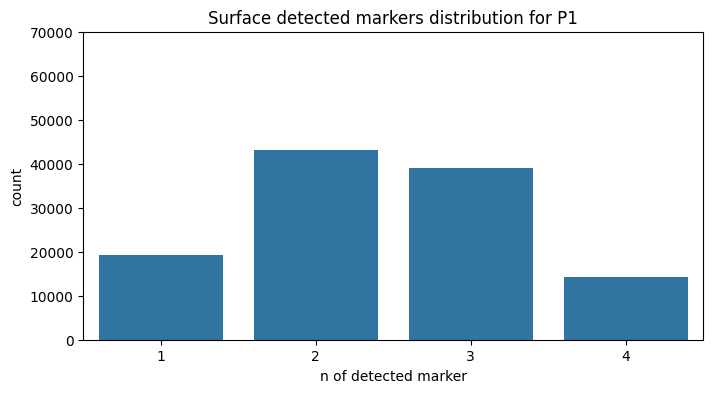

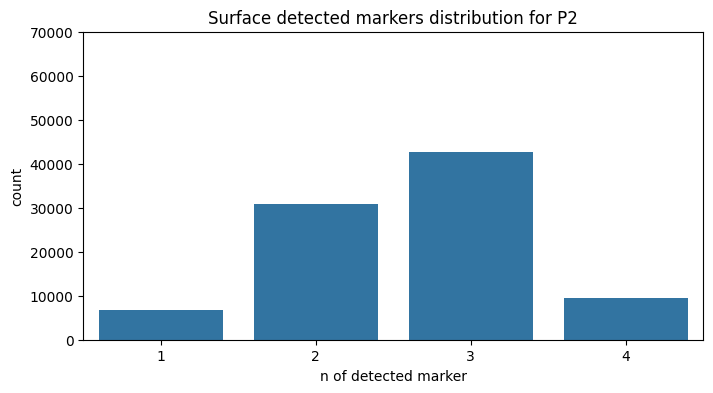

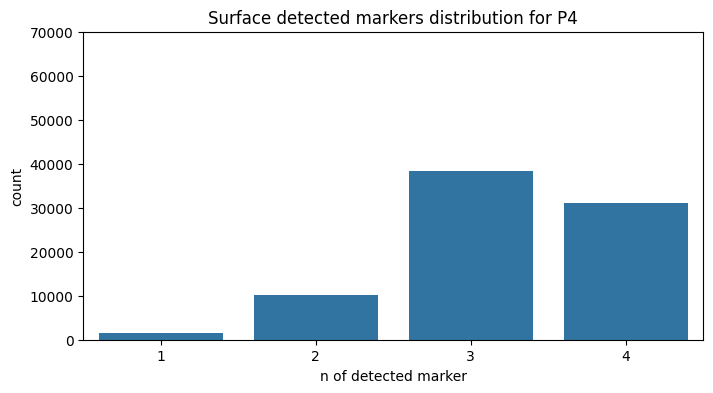

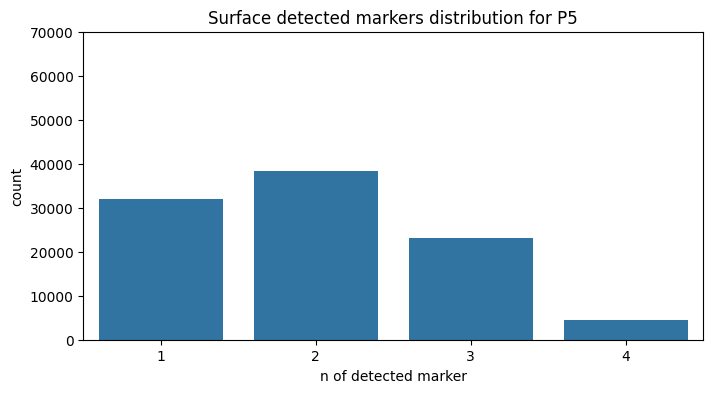

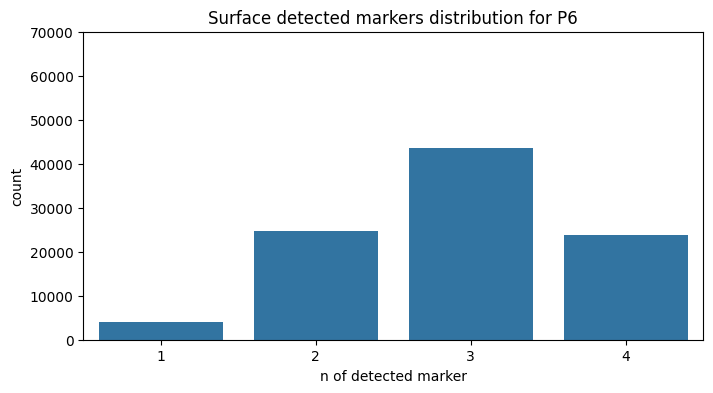

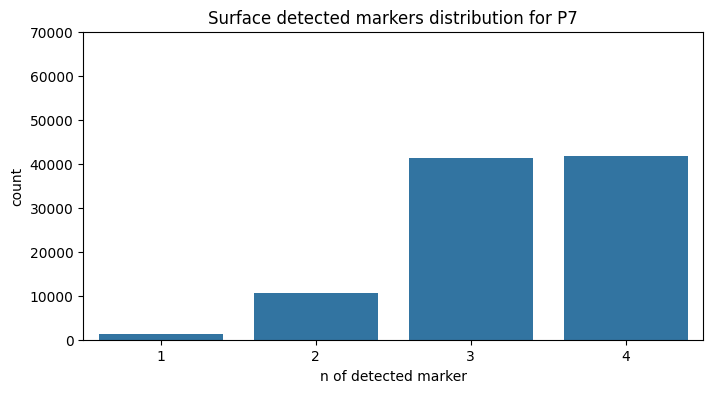

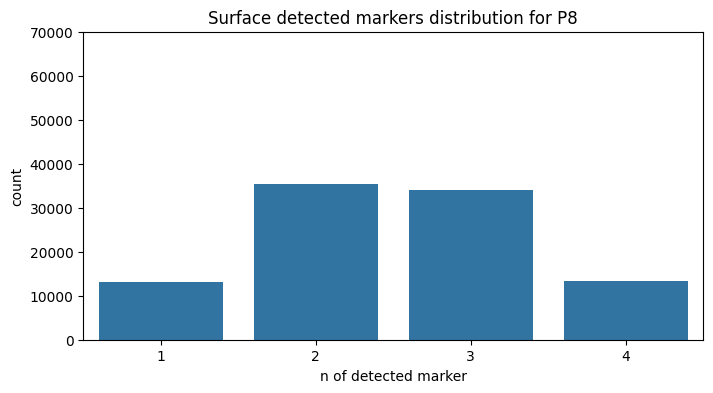

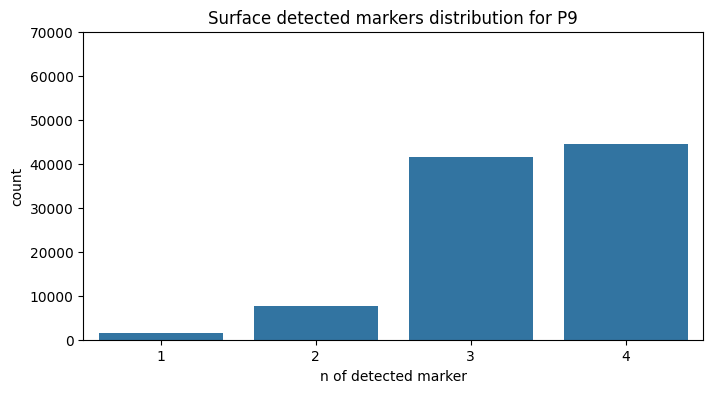

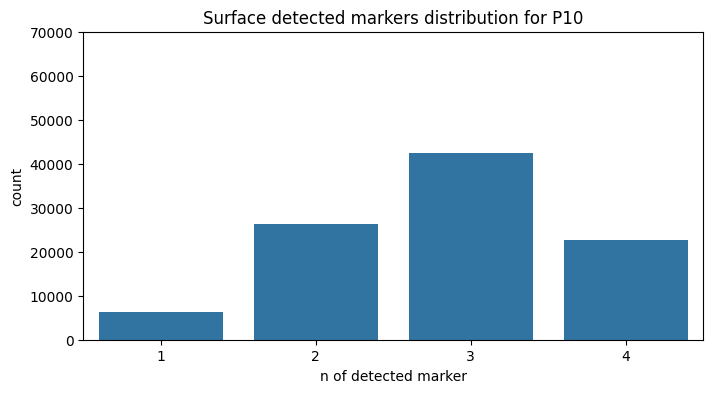

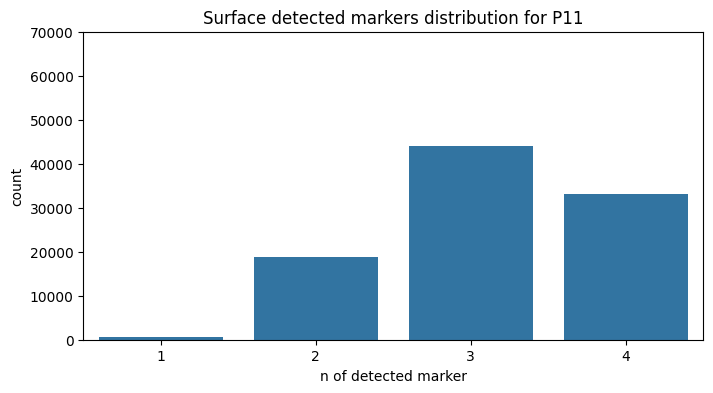

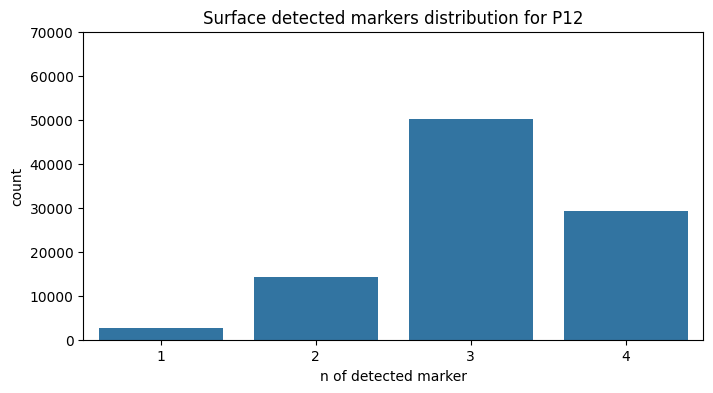

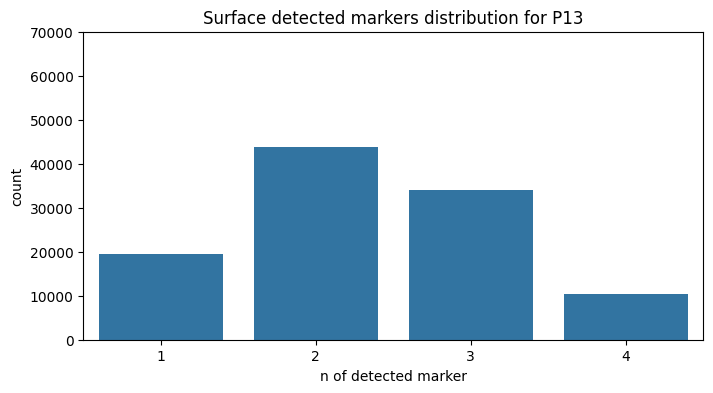

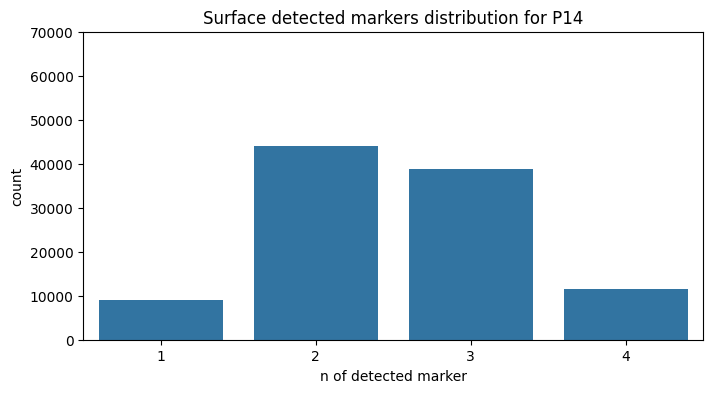

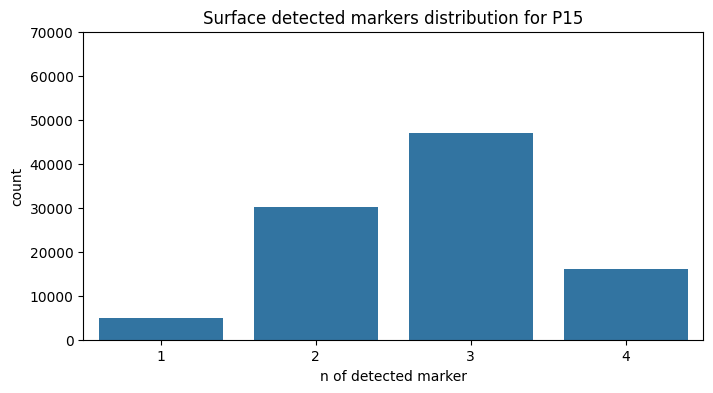

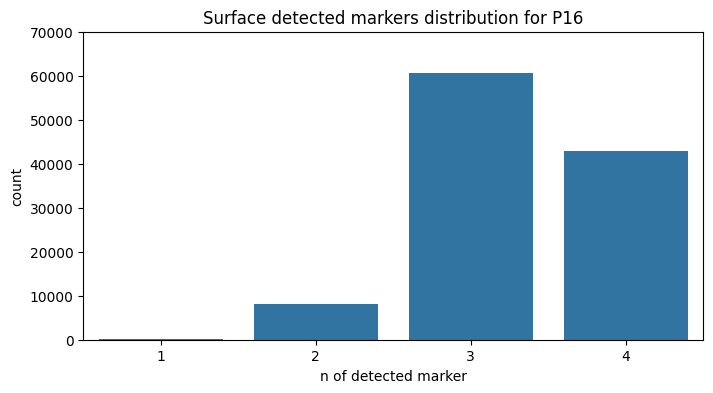

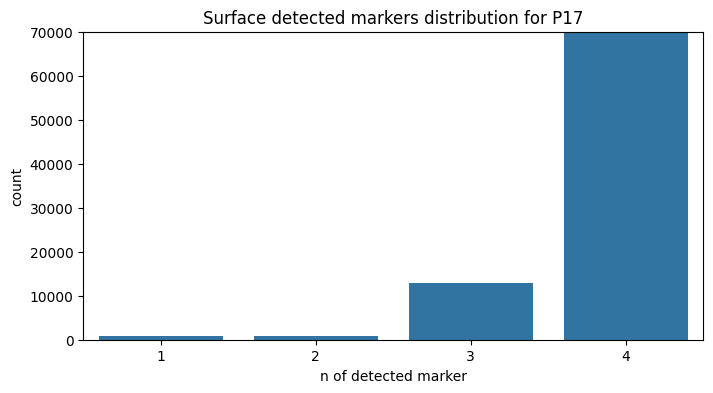

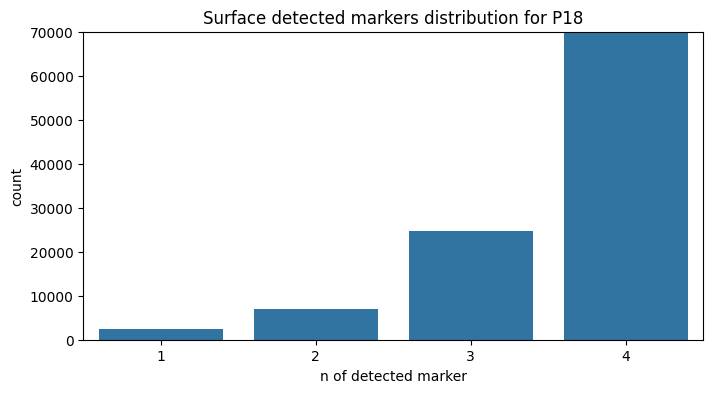

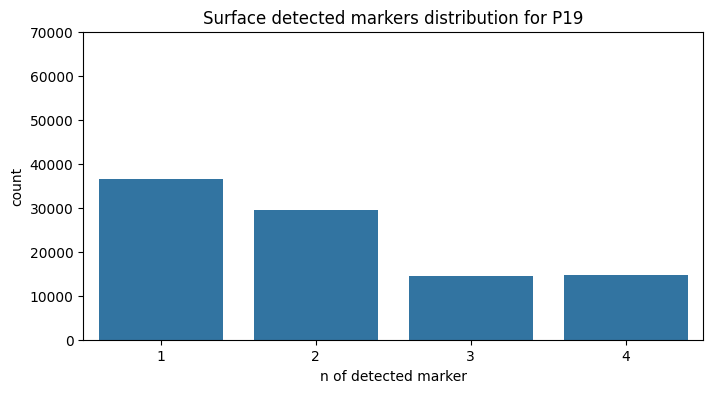

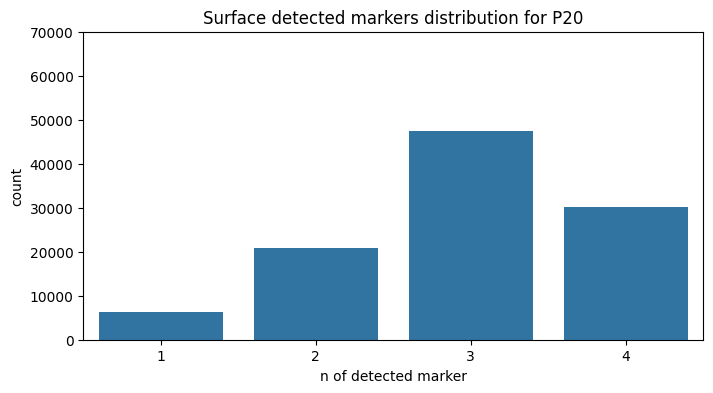

In [38]:
for pid in participant_ids:
    participant_df = df[df['participant_id'] == pid]
    plt.figure(figsize=(8, 4))
    sns.countplot(x=participant_df['num_detected_markers'])
    plt.title(f'Surface detected markers distribution for P{pid}')
    plt.xlabel('n of detected marker')
    plt.ylabel('count')
    plt.ylim(0,70000)
    plt.show()

##### Detected markers boxplot
- No-one has the median on 1: Good

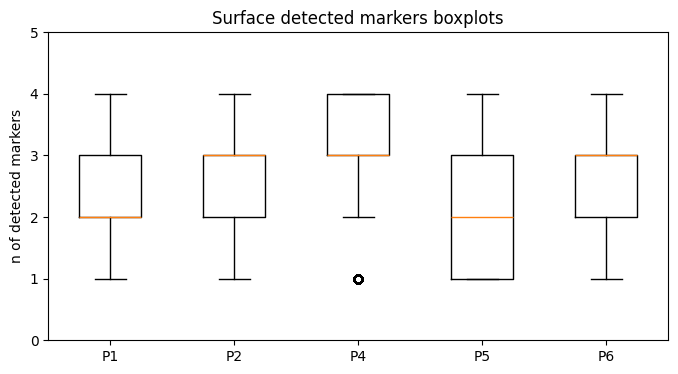

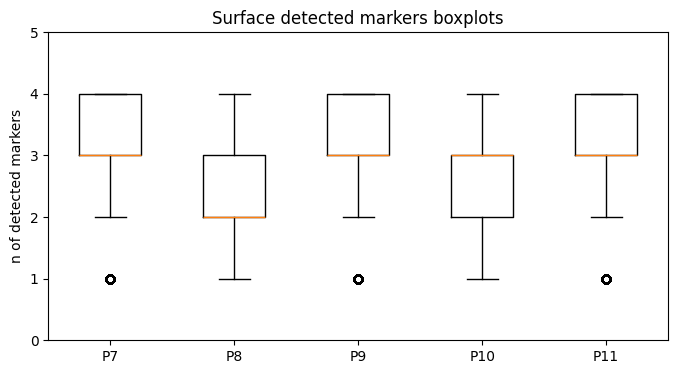

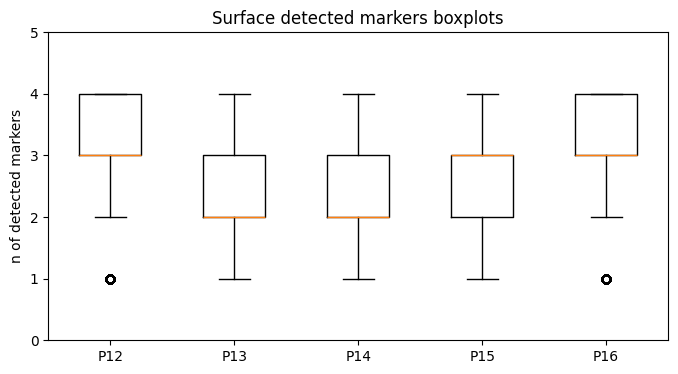

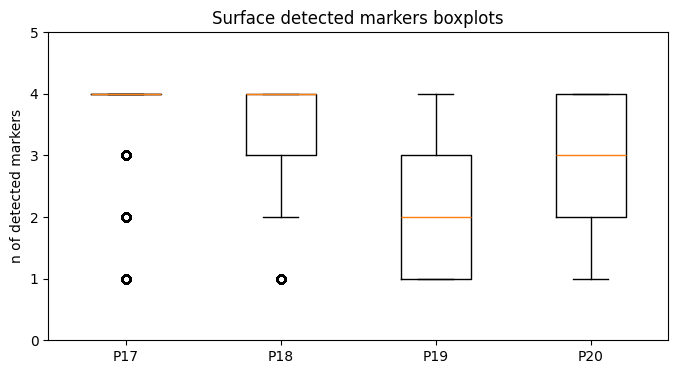

In [39]:
grouped_ids = [participant_ids[i:i+5] for i in range(0, len(participant_ids), 5)] #group ids
for group in grouped_ids: #iterate groups
    participants_df = [df[df['participant_id'] == pid]['num_detected_markers'] for pid in group] #get group's sub-dfs
    plt.figure(figsize=(8, 4))
    plt.boxplot(participants_df, whis = 1.5)
    plt.title(f'Surface detected markers boxplots')
    plt.ylabel('n of detected markers')
    plt.ylim(0, 5)
    plt.xticks(range(1, len(group) + 1), [f'P{pid}' for pid in group]) #single boxplots labels
    plt.show()

##### Detected markers violinplot
- Good

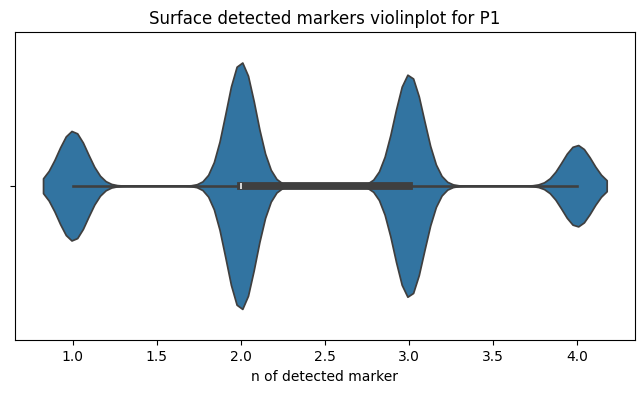

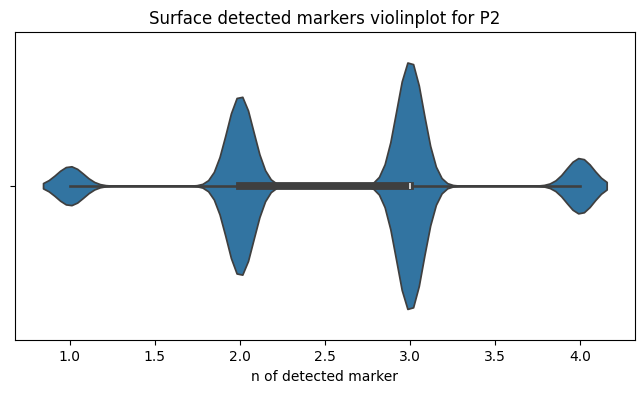

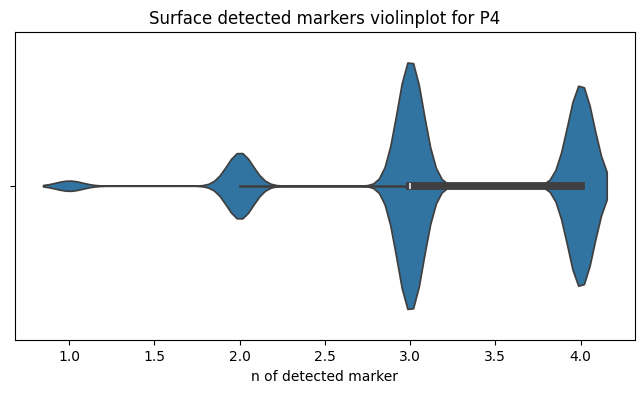

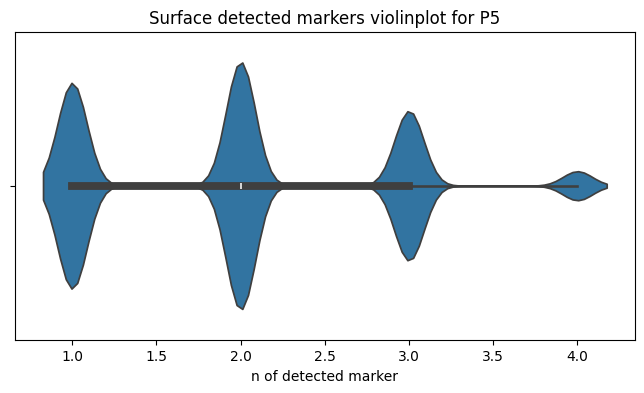

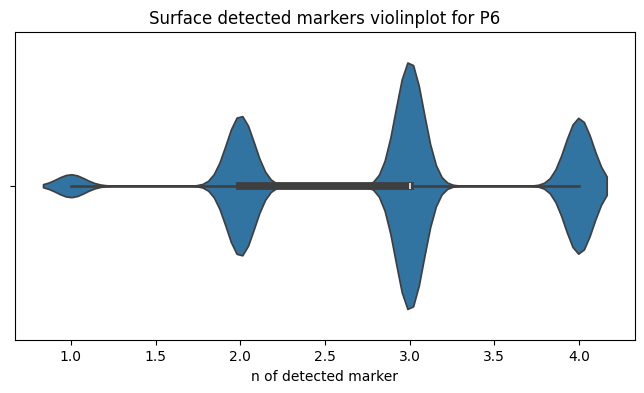

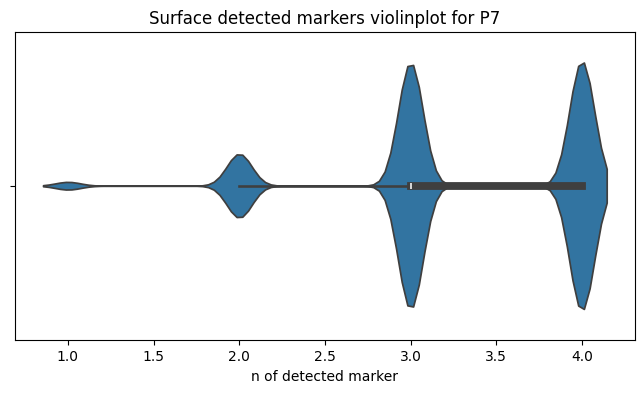

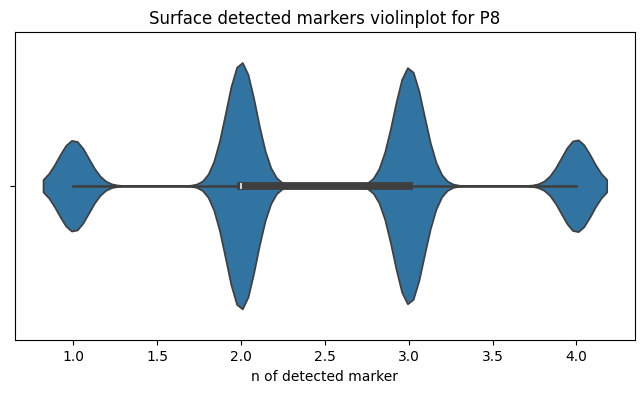

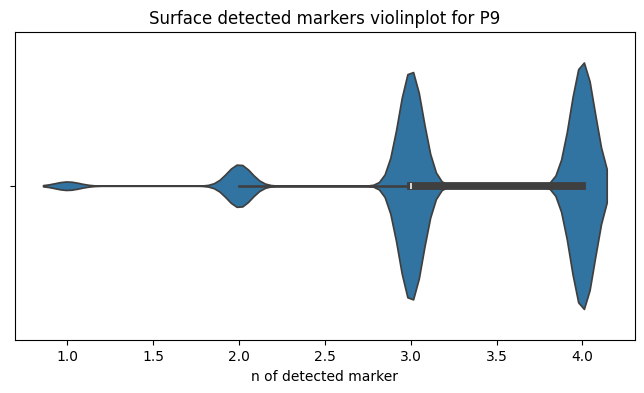

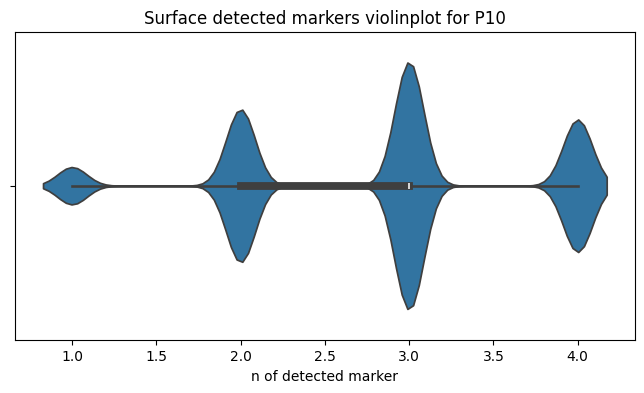

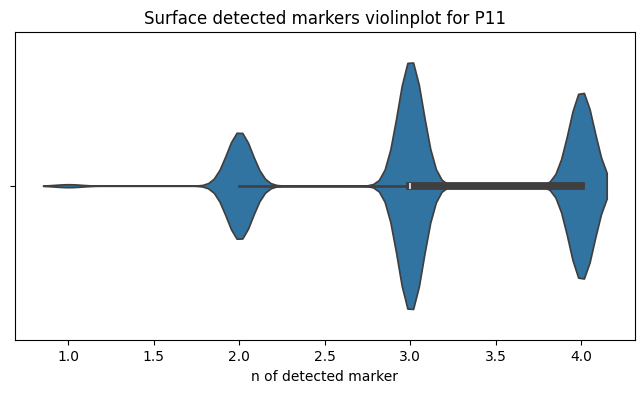

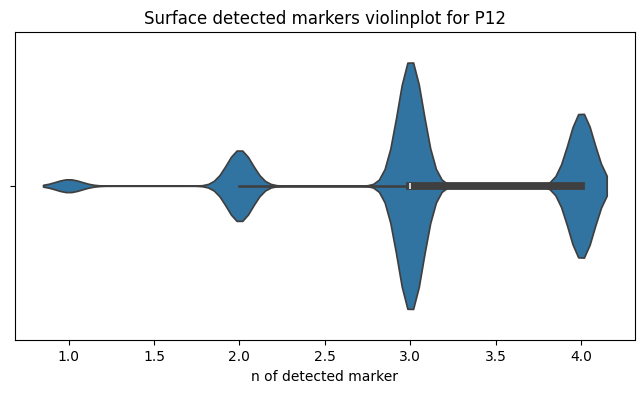

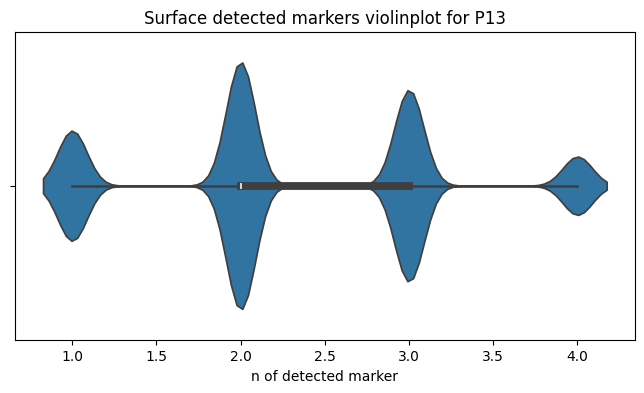

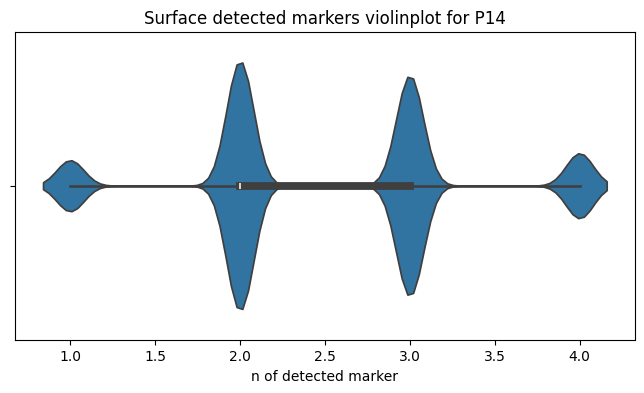

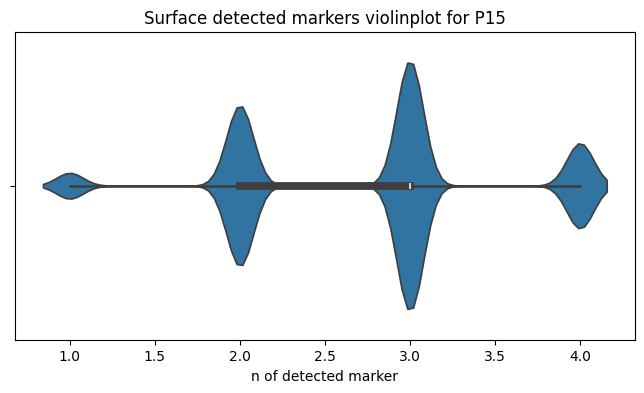

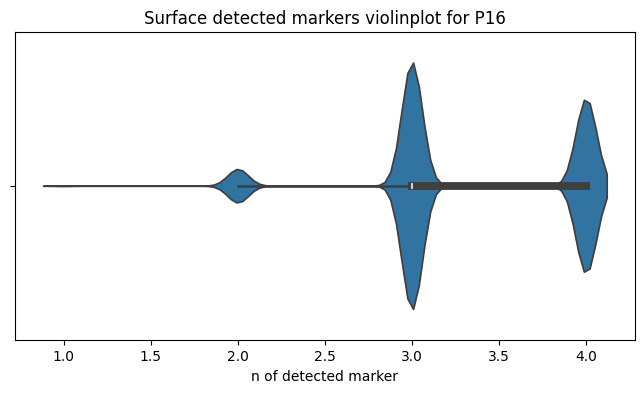

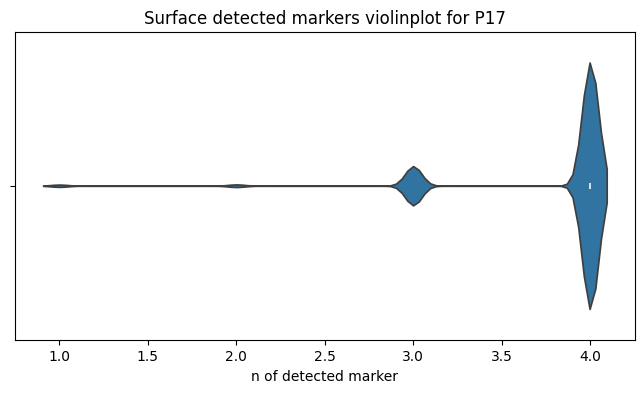

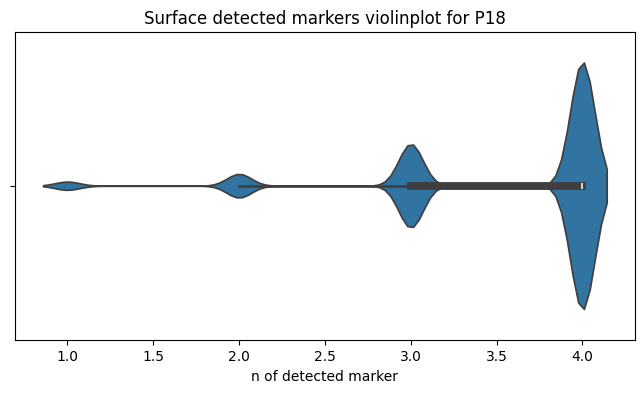

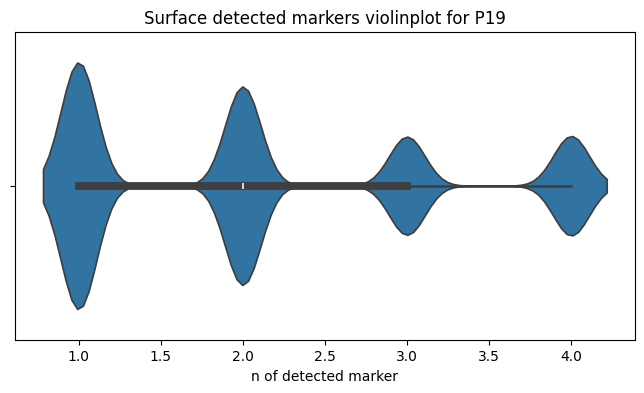

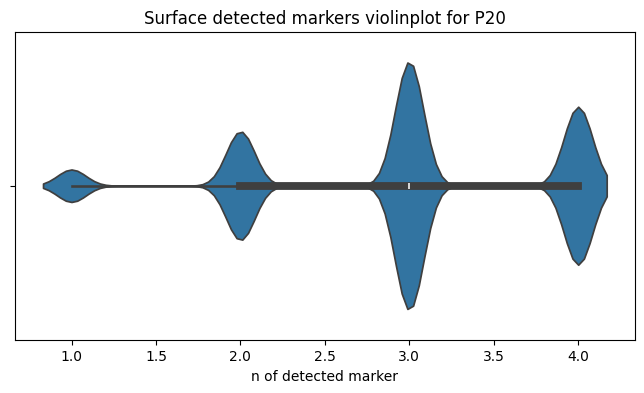

In [40]:
for pid in participant_ids:
    participant_df = df[df['participant_id'] == pid]
    plt.figure(figsize=(8, 4))
    sns.violinplot(x=participant_df['num_detected_markers'])
    plt.title(f'Surface detected markers violinplot for P{pid}')
    plt.xlabel('n of detected marker')
    plt.show()

##### Detected markers piechart
- Good

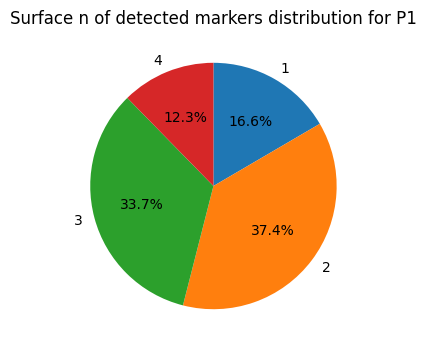

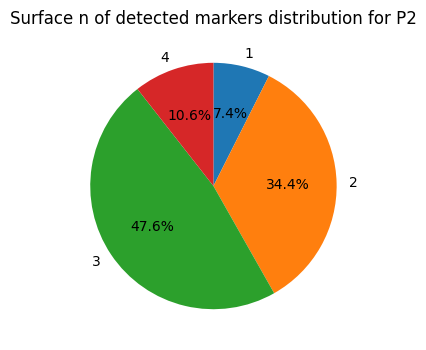

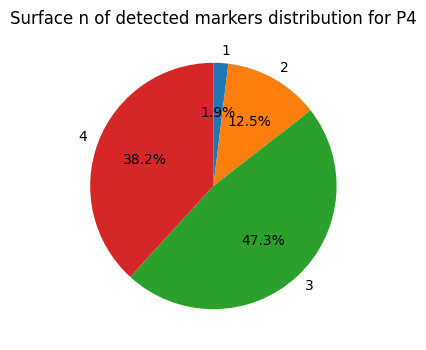

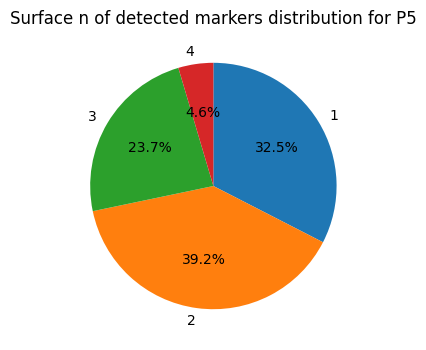

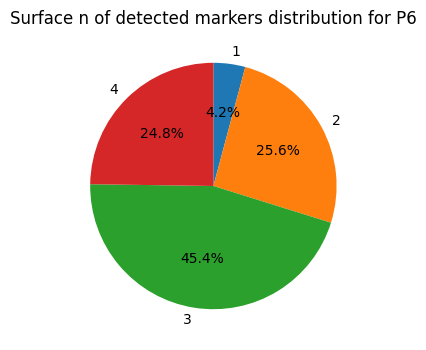

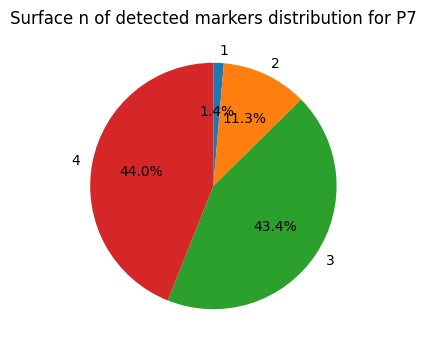

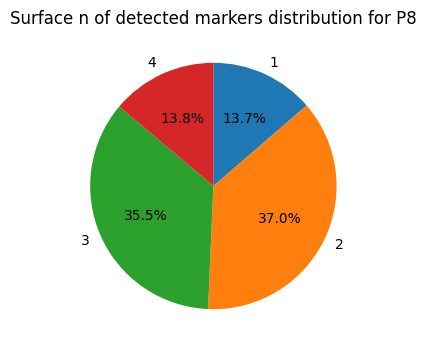

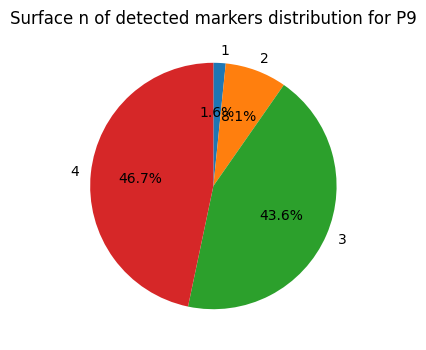

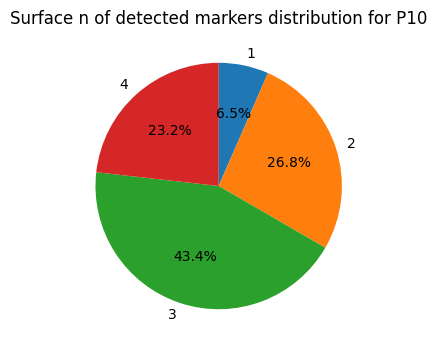

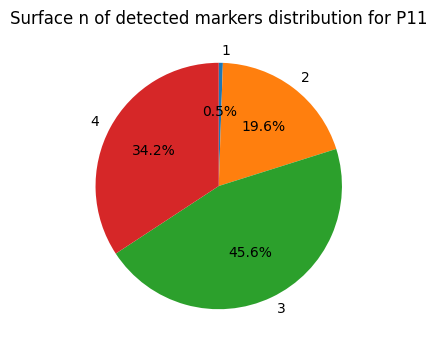

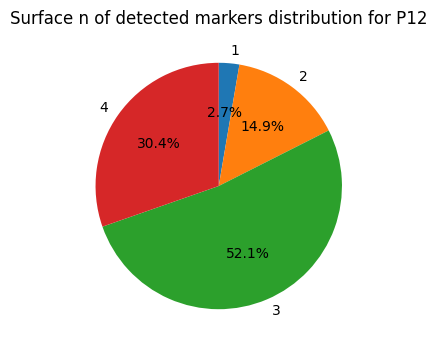

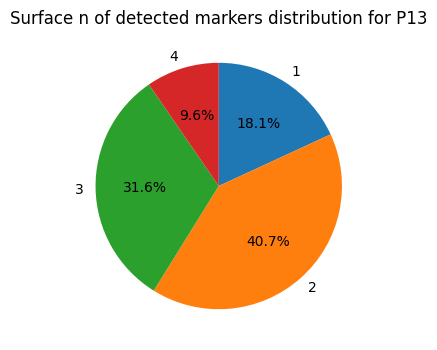

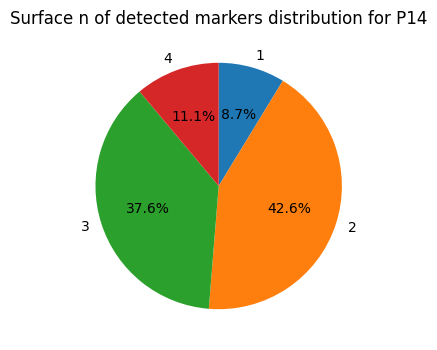

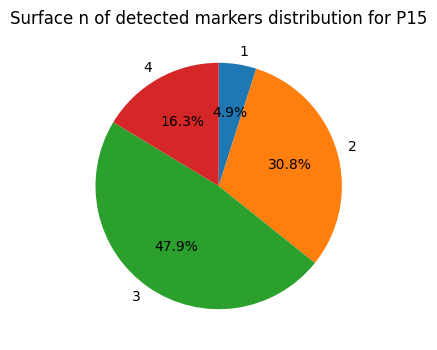

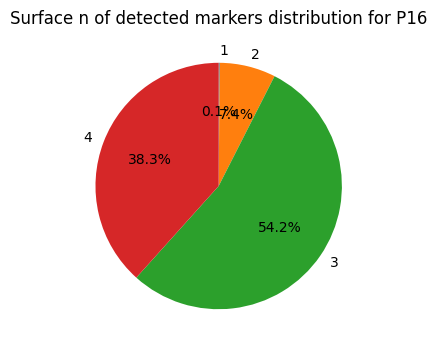

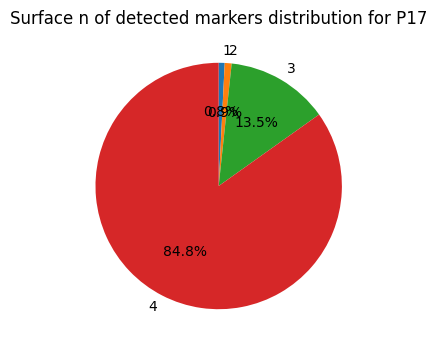

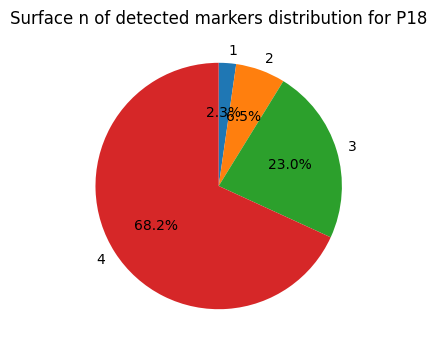

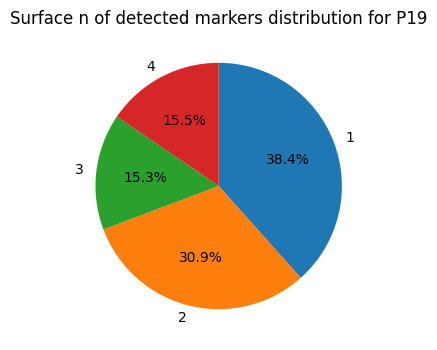

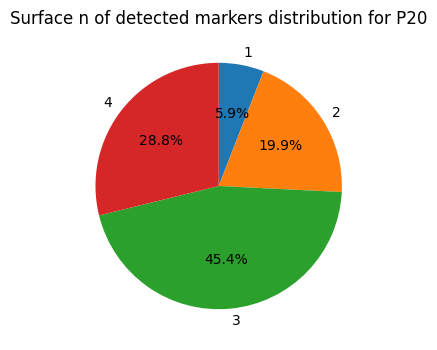

In [41]:
for pid in participant_ids:
    participant_df = df[df['participant_id'] == pid]
    counts = participant_df['num_detected_markers'].value_counts().sort_index()
    plt.figure(figsize=(8, 4))
    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, counterclock=False)
    plt.title(f'Surface n of detected markers distribution for P{pid}')
    plt.show()